In [145]:
import collections
import pandas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [146]:
!pwd

/Users/nurrizkyimani/DataspellProjects/flood-jsc-yli


In [147]:
from collections import defaultdict

rekap_yr_dict = defaultdict()

for yr in range(2013,2021):
    path = "dataset/data-rekapitulasi/data-rekapitulasi-kejadian-banjir-tahun-{}.csv".format(yr)
    data_rekap = pd.read_csv(path)
    rekap_yr_dict[yr] = data_rekap

In [148]:
rc : pd.DataFrame = rekap_yr_dict[2013]
len(rc.columns)

15

In [151]:
all_rekap = pd.concat(rekap_yr_dict)
all_rekap

bulan  kecamatan  kelurahan rata_rata_ketinggian_air lama_genangan  \
2013 0       1       35.0      124.0               10 - 400            15.0   
     1       2       15.0       34.0               10 - 175             8.0   
     2       3        5.0        9.0               10 - 250             2.0   
     3       4       10.0       16.0               10 - 100             4.0   
     4       5       10.0       16.0                0 - 160             3.0   
...        ...        ...        ...                      ...           ...   
2020 7       8       10.0       12.0             10 s.d 80 cm        1 hari   
     8       9       16.0       28.0            10 s.d 130 cm  1 s.d 2 hari   
     9      10       29.0       72.0            10 s.d 180 cm  1 s.d 2 hari   
     10     11       16.0       27.0             10 s.d 60 cm  1 s.d 2 hari   
     11     12        7.0        9.0             10 s.d 80 cm        1 hari   

         rw_terdampak kk_terdampak jiwa_terdampak  korban_meninggal  \
2013 0         2414.0     506164.0      1226487.0              38.0   
     1          207.0      19177.0        46865.0               0.0   
     2           68.0       9215.0        27020.0               0.0   
     3           66.0       6004.0        15060.0               0.0   
     4          139.0       4740.0        18481.0               0.0   
...               ...          ...            ...               ...   
2020 7           20.0            0              0               0.0   
     8           65.0          414           1300               0.0   
     9          170.0         1933           6250               0.0   
     10          54.0            0              0               0.0   
     11          18.0          250            827               0.0   

         korban_hilang  korban_luka_berat  korban_luka_ringan  \
2013 0             0.0                0.0                 0.0   
     1             0.0                0.0                 0.0   
     2             0.0                0.0                 0.0   
     3             0.0                0.0                 0.0   
     4             0.0                0.0                 0.0   
...                ...                ...                 ...   
2020 7             0.0                0.0                 0.0   
     8             0.0                0.0                 0.0   
     9             0.0                0.0                 0.0   
     10            0.0                0.0                 0.0   
     11            0.0                0.0                 0.0   

         jumlah_jiwa_pengungsi_tertinggi  jumlah_tempat_pengungsian  \
2013 0                           83554.0                     1115.0   
     1                             740.0                       21.0   
     2                            2406.0                       34.0   
     3                             318.0                        7.0   
     4                            1245.0                       42.0   
...                                  ...                        ...   
2020 7                               0.0                        0.0   
     8                             104.0                        5.0   
     9                             675.0                       12.0   
     10                              0.0                        0.0   
     11                              0.0                        0.0   

        jumlah_nilai_kerugian  
2013 0                      0  
     1                      0  
     2                      0  
     3                      0  
     4                      0  
...                       ...  
2020 7                    n.a  
     8                    n.a  
     9                    n.a  
     10                   n.a  
     11                   n.a  

[95 rows x 15 columns]

In [152]:
all_rekap.index[0][1]
len(all_rekap.columns)

15

In [153]:
all_rekap.reset_index(inplace=True)
# df = df.rename(columns = {'index':'new column name'})

In [154]:
all_rekap.drop('level_1', axis=1, inplace= True)

In [155]:
# all_rekap.rename({'level_0' : 'tahun'}, axis='columns')
all_rekap = all_rekap.rename(columns = {'level_0':'tahun'})

In [156]:
all_rekap.dtypes

tahun                                int64
bulan                                int64
kecamatan                          float64
kelurahan                          float64
rata_rata_ketinggian_air            object
lama_genangan                       object
rw_terdampak                       float64
kk_terdampak                        object
jiwa_terdampak                      object
korban_meninggal                   float64
korban_hilang                      float64
korban_luka_berat                  float64
korban_luka_ringan                 float64
jumlah_jiwa_pengungsi_tertinggi    float64
jumlah_tempat_pengungsian          float64
jumlah_nilai_kerugian               object
dtype: object

In [157]:
import numpy as np
all_rekap = all_rekap.fillna(0)

In [158]:
all_rekap

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
0,2013,1,35.0,124.0,10 - 400,15.0,2414.0,506164.0,1226487.0,38.0,0.0,0.0,0.0,83554.0,1115.0,0
1,2013,2,15.0,34.0,10 - 175,8.0,207.0,19177.0,46865.0,0.0,0.0,0.0,0.0,740.0,21.0,0
2,2013,3,5.0,9.0,10 - 250,2.0,68.0,9215.0,27020.0,0.0,0.0,0.0,0.0,2406.0,34.0,0
3,2013,4,10.0,16.0,10 - 100,4.0,66.0,6004.0,15060.0,0.0,0.0,0.0,0.0,318.0,7.0,0
4,2013,5,10.0,16.0,0 - 160,3.0,139.0,4740.0,18481.0,0.0,0.0,0.0,0.0,1245.0,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020,8,10.0,12.0,10 s.d 80 cm,1 hari,20.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,n.a
91,2020,9,16.0,28.0,10 s.d 130 cm,1 s.d 2 hari,65.0,414,1300,0.0,0.0,0.0,0.0,104.0,5.0,n.a
92,2020,10,29.0,72.0,10 s.d 180 cm,1 s.d 2 hari,170.0,1933,6250,0.0,0.0,0.0,0.0,675.0,12.0,n.a
93,2020,11,16.0,27.0,10 s.d 60 cm,1 s.d 2 hari,54.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,n.a


In [159]:
all_rekap = all_rekap.astype({
    "kecamatan": int,
    "kelurahan": int,

})

# "rw_terdampak": int,
# "kk_terdampak":  int,
# "jiwa_terdampak":  int,
# "korban_meninggal":  int,
# "korban_hilang":  int,
# "korban_luka_ringan":  int,
# "korban_luka_berat":  int,
# "jumlah_jiwa_pengungsi_tertinggi":  int,
# "jumlah_nilai_kerugian":  int,
# "jumlah_tempat_pengungsian":  int,

all_rekap['rw_terdampak'] = all_rekap['rw_terdampak'].astype('int64')
all_rekap['korban_meninggal'] = all_rekap['korban_meninggal'].astype('int64')
all_rekap['korban_hilang']  = all_rekap['korban_hilang'].astype('int64')

In [160]:
# all_rekap.replace('n.a', 0)
# all_rekap['kk_terdampak'] = all_rekap['kk_terdampak'].fillna(0)
# all_rekap['kk_terdampak'].astype('int64')

all_rekap['jiwa_terdampak'] = all_rekap['jiwa_terdampak']

# all_rekap['jiwa_terdampak'].astype('int64')
# all_rekap


In [161]:
all_rekap.dtypes

tahun                                int64
bulan                                int64
kecamatan                            int64
kelurahan                            int64
rata_rata_ketinggian_air            object
lama_genangan                       object
rw_terdampak                         int64
kk_terdampak                        object
jiwa_terdampak                      object
korban_meninggal                     int64
korban_hilang                        int64
korban_luka_berat                  float64
korban_luka_ringan                 float64
jumlah_jiwa_pengungsi_tertinggi    float64
jumlah_tempat_pengungsian          float64
jumlah_nilai_kerugian               object
dtype: object

In [162]:
all_rekap.drop('jumlah_nilai_kerugian', axis=1, inplace= True)

In [163]:
all_rekap['jumlah_tempat_pengungsian']  = all_rekap['jumlah_tempat_pengungsian'].astype('int64')
all_rekap['jumlah_jiwa_pengungsi_tertinggi']  = all_rekap['jumlah_jiwa_pengungsi_tertinggi'].astype('int64')
all_rekap['korban_luka_ringan']  = all_rekap['korban_luka_ringan'].astype('int64')
all_rekap['korban_luka_berat']  = all_rekap['korban_luka_berat'].astype('int64')

In [164]:
all_rekap.dtypes

tahun                               int64
bulan                               int64
kecamatan                           int64
kelurahan                           int64
rata_rata_ketinggian_air           object
lama_genangan                      object
rw_terdampak                        int64
kk_terdampak                       object
jiwa_terdampak                     object
korban_meninggal                    int64
korban_hilang                       int64
korban_luka_berat                   int64
korban_luka_ringan                  int64
jumlah_jiwa_pengungsi_tertinggi     int64
jumlah_tempat_pengungsian           int64
dtype: object

In [165]:
df_2020= all_rekap[all_rekap['tahun'] == 2020]

In [166]:
df_2020

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
83,2020,1,35,151,10 s.d 350 cm,4 hari,390,22148,83406,19,0,0,0,36445,269
84,2020,2,42,167,5 s.d 200 cm,1 s.d 2 hari,581,12551,43464,6,0,0,0,13808,119
85,2020,3,24,46,5 s.d 160 cm,1 s.d 2 hari,104,3057,9687,0,0,0,0,453,14
86,2020,4,21,50,10 s.d 130 cm,1 s.d 2 hari,106,1059,2966,0,0,0,0,75,2
87,2020,5,12,23,10 s.d 200 cm,1 s.d 2 hari,47,891,3117,0,0,0,0,213,6
88,2020,6,9,16,5 s.d 120 cm,1 hari,46,80,320,0,0,0,0,320,7
89,2020,7,2,2,20 s.d 50 cm,1 hari,4,0,0,0,0,0,0,0,0
90,2020,8,10,12,10 s.d 80 cm,1 hari,20,0,0,0,0,0,0,0,0
91,2020,9,16,28,10 s.d 130 cm,1 s.d 2 hari,65,414,1300,0,0,0,0,104,5
92,2020,10,29,72,10 s.d 180 cm,1 s.d 2 hari,170,1933,6250,0,0,0,0,675,12


In [167]:
test = np.random.standard_normal(50).cumsum()

print(len(test))
print(test)

50
[-6.75877836e-01 -3.09248600e-03 -1.99426926e-01  1.36721180e+00
  1.01189081e-01  1.12831193e-03 -2.09816730e-01 -7.26877051e-02
  3.80905475e-01 -2.17310181e-01 -1.31266564e+00  1.56628229e-01
  7.32082127e-01 -1.02771335e+00  1.43211077e-01  1.36112305e+00
  1.86318777e+00  6.96063723e-01  2.16348310e+00  1.27118147e+00
 -2.56726152e-01  3.08587858e-01 -3.15924382e-01  6.36812881e-01
  2.60732947e-01 -2.47080775e-01  1.29538902e+00 -7.77796794e-01
  2.69785974e-03 -7.65728803e-01  4.95945101e-02 -1.37534477e-01
 -1.11550137e+00 -9.52359776e-01 -5.43372064e-01  1.60560092e+00
  1.49297384e+00  2.95841515e-01 -7.07473642e-02 -2.10873847e-01
 -1.52933378e-01 -6.48311541e-01  4.48757313e-01  9.79626757e-01
  6.97809073e-01  7.31500449e-01  1.11558218e+00  3.55853460e+00
  3.45102936e+00  2.76417281e+00]


In [168]:
df_2020_rw = df_2020['rw_terdampak']
df_2020_bulan = df_2020['bulan']

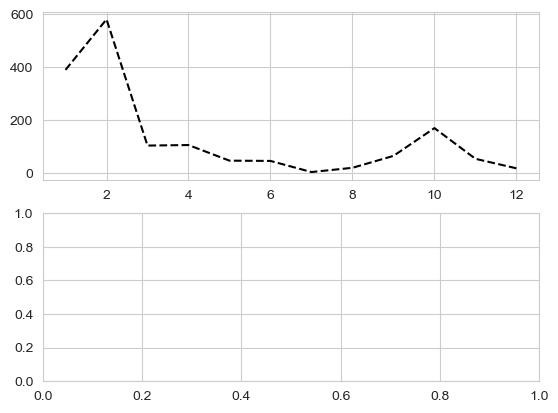

In [169]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(2, 2, 3)

ax1.plot(df_2020_bulan,df_2020_rw,  color="black", linestyle="dashed")
ax1.plot()

ax2

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_21463/121584360.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot()


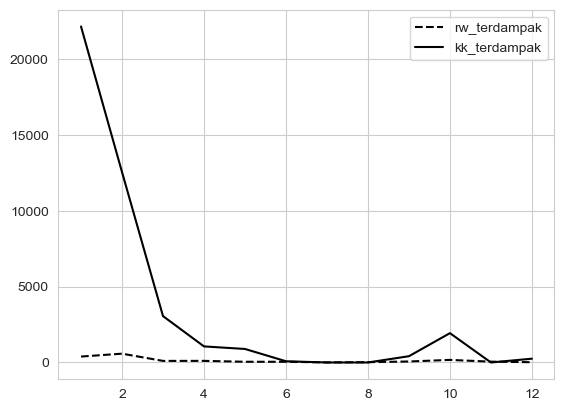

In [171]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df_2020_bulan, df_2020_rw, color="black",linestyle="dashed", label="rw_terdampak");

df_2020_kk = df_2020['kk_terdampak']
ax1 = fig.add_subplot()
ax1.plot(df_2020_bulan, df_2020_kk, color="black",linestyle="solid", label="kk_terdampak");

ax.legend()

In [172]:
# !conda install seaborn -y

/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


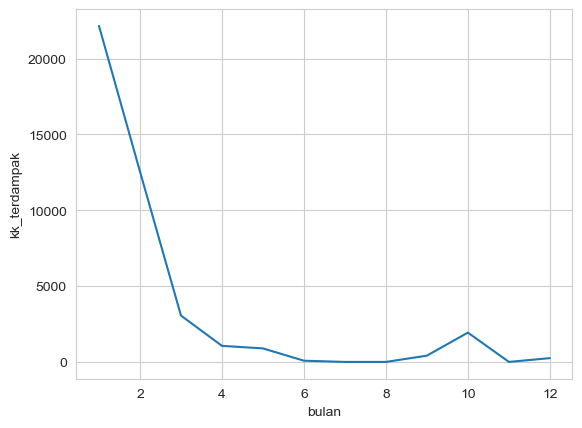

In [173]:

# df_2020_kk = df_2020['kk_terdampak']
# ax1 = fig.add_subplot()
# ax1.plot(df_2020_bulan, df_2020_kk, color="black",linestyle="solid", label="kk_terdampak");

import seaborn as sns
sns.lineplot(df_2020_bulan, df_2020_kk)

/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


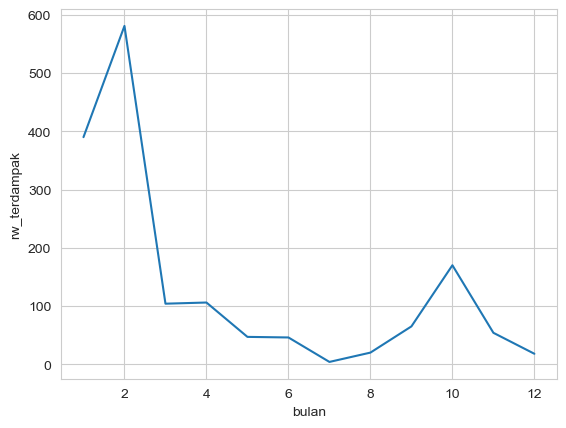

In [174]:
sns.lineplot(df_2020_bulan, df_2020_rw)

In [175]:
import matplotlib.pyplot as plt

all_rekap['kk_terdampak'] = all_rekap['kk_terdampak'].

df_2020 = all_rekap[all_rekap['tahun'] == 2020]
df_2019 = all_rekap[all_rekap['tahun'] == 2019]
df_2018 = all_rekap[all_rekap['tahun'] == 2018]
df_2017 = all_rekap[all_rekap['tahun'] == 2017]

plt.plot(df_2020['bulan'], df_2020['kk_terdampak'], label = "2020")
plt.plot(df_2020['bulan'], df_2019['kk_terdampak'], label = "2019")
plt.plot(df_2020['bulan'], df_2018['kk_terdampak'], label = "2018")
plt.plot(df_2020['bulan'], df_2017['kk_terdampak'], label = "2017")
plt.title("KK Terdampak tahun 2017-2020")
# plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()

SyntaxError: invalid syntax (730424995.py, line 3)

In [176]:
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s.d 2 hari', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 6', 6)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('2 hari', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 hari', 1)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('4 hari', 4)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 2', 2)

all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 2', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 6', 6)


all_rekap['lama_genangan'].iloc[59] = 2
all_rekap['lama_genangan'].iloc[60] = 6

all_rekap['lama_genangan'] = all_rekap['lama_genangan'].astype(int)

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_21463/790911078.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rekap['lama_genangan'].iloc[59] = 2
/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_21463/790911078.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rekap['lama_genangan'].iloc[60] = 6


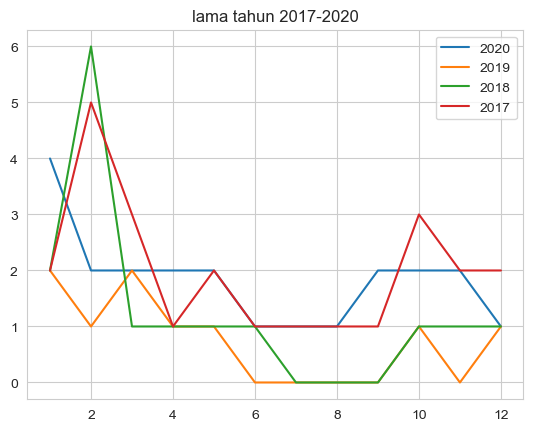

In [177]:
import matplotlib.pyplot as plt

df_2020 = all_rekap[all_rekap['tahun'] == 2020]
df_2019 = all_rekap[all_rekap['tahun'] == 2019]
df_2018 = all_rekap[all_rekap['tahun'] == 2018]
df_2017 = all_rekap[all_rekap['tahun'] == 2017]

plt.plot(df_2020['bulan'], df_2020['lama_genangan'], label = "2020")
plt.plot(df_2020['bulan'], df_2019['lama_genangan'], label = "2019")
plt.plot(df_2020['bulan'], df_2018['lama_genangan'], label = "2018")
plt.plot(df_2020['bulan'], df_2017['lama_genangan'], label = "2017")
plt.title("lama tahun 2017-2020")
# plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()

In [178]:
all_rekap.columns

Index(['tahun', 'bulan', 'kecamatan', 'kelurahan', 'rata_rata_ketinggian_air',
       'lama_genangan', 'rw_terdampak', 'kk_terdampak', 'jiwa_terdampak',
       'korban_meninggal', 'korban_hilang', 'korban_luka_berat',
       'korban_luka_ringan', 'jumlah_jiwa_pengungsi_tertinggi',
       'jumlah_tempat_pengungsian'],
      dtype='object')

In [179]:
all_rekap["rata_rata_ketinggian_air"]

0        10 - 400  
1        10 - 175  
2        10 - 250  
3        10 - 100  
4         0 - 160  
          ...      
90     10 s.d 80 cm
91    10 s.d 130 cm
92    10 s.d 180 cm
93     10 s.d 60 cm
94     10 s.d 80 cm
Name: rata_rata_ketinggian_air, Length: 95, dtype: object

In [180]:
all_rekap

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
0,2013,1,35,124,10 - 400,15,2414,506164.0,1226487.0,38,0,0,0,83554,1115
1,2013,2,15,34,10 - 175,8,207,19177.0,46865.0,0,0,0,0,740,21
2,2013,3,5,9,10 - 250,2,68,9215.0,27020.0,0,0,0,0,2406,34
3,2013,4,10,16,10 - 100,4,66,6004.0,15060.0,0,0,0,0,318,7
4,2013,5,10,16,0 - 160,3,139,4740.0,18481.0,0,0,0,0,1245,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020,8,10,12,10 s.d 80 cm,1,20,0,0,0,0,0,0,0,0
91,2020,9,16,28,10 s.d 130 cm,2,65,414,1300,0,0,0,0,104,5
92,2020,10,29,72,10 s.d 180 cm,2,170,1933,6250,0,0,0,0,675,12
93,2020,11,16,27,10 s.d 60 cm,2,54,0,0,0,0,0,0,0,0


# Data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari

In [76]:
path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"a
data_kejadian = pd.read_csv(path)

In [77]:
data_kejadian

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Jakarta Timur,PASAR REBO,PEKAYON,"RW 02, 08",2,2,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
146,Jakarta Timur,PASAR REBO,GEDONG,"RW. 01, 03, 11",3,3,25,100,100 s/d 150 cm,tgl. 01 Januari,0,0,0,0,100,1,0,0
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
148,Jakarta Timur,PULOGADUNG,JATI,RW 08,1,2,21,84,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0


In [78]:
data_kejadian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           150 non-null    object
 1   kecamatan                   150 non-null    object
 2   kelurahan                   150 non-null    object
 3   rw                          150 non-null    object
 4   jumlah_terdampak_rw         150 non-null    int64 
 5   jumlah_terdampak_rt         150 non-null    int64 
 6   jumlah_terdampak_kk         150 non-null    int64 
 7   jumlah_terdampak_jiwa       150 non-null    int64 
 8   ketinggian_air              150 non-null    object
 9   tanggal_kejadian            150 non-null    object
 10  lama_genangan               150 non-null    int64 
 11  jumlah_meninggal            150 non-null    int64 
 12  jumlah_hilang               150 non-null    int64 
 13  jumlah_luka_berat           150 non-null    int64 

In [79]:
data_kejadian.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.0,150.0,150.000000,150.000000,150.0,150.0
mean,4.340000,6.693333,147.300000,553.960000,0.086667,0.0,0.0,0.0,481.666667,3.173333,0.0,0.0
std,2.976034,7.268528,240.698696,881.477846,0.305139,0.0,0.0,0.0,764.574380,4.346945,0.0,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
25%,2.000000,2.000000,4.250000,17.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
50%,4.000000,5.000000,51.000000,192.500000,0.000000,0.0,0.0,0.0,150.000000,2.000000,0.0,0.0
75%,6.000000,7.000000,167.500000,693.750000,0.000000,0.0,0.0,0.0,572.000000,5.000000,0.0,0.0
max,15.000000,38.000000,1140.000000,4560.000000,2.000000,0.0,0.0,0.0,4461.000000,31.000000,0.0,0.0


In [80]:
dk_jaktim = data_kejadian[data_kejadian.kota_administrasi == "Jakarta Timur"]

In [81]:
dk_jaktim

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,"RW 01, 03, 06, 07, 08",5,7,212,850,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,850,3,0,0
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,"RW 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",12,12,160,658,10 s/d 70 cm,tgl. 02 Januari,0,0,0,0,658,0,0,0
106,Jakarta Timur,CAKUNG,PENGGILINGAN,"RW 04, 06, 07",3,3,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
107,Jakarta Timur,CAKUNG,RAWA TERATE,"RW 04, 05",2,3,48,195,10 s/d 200 cm,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,RW 01,1,3,23,70,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
109,Jakarta Timur,CAKUNG,JATINEGARA,"RW. 02,03,05,06,07,09,010,12,13,14",10,10,38,150,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,150,0,0,0
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,"RW 01, 02, 03, 05",4,9,12,48,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,48,2,0,0
111,Jakarta Timur,CIPAYUNG,CEGER,"RW 01,02,05",3,3,20,80,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,80,1,0,0
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,"RW 03, 04, 06, 07",4,7,64,190,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,"RW 03, 12",2,5,0,0,71 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0


/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


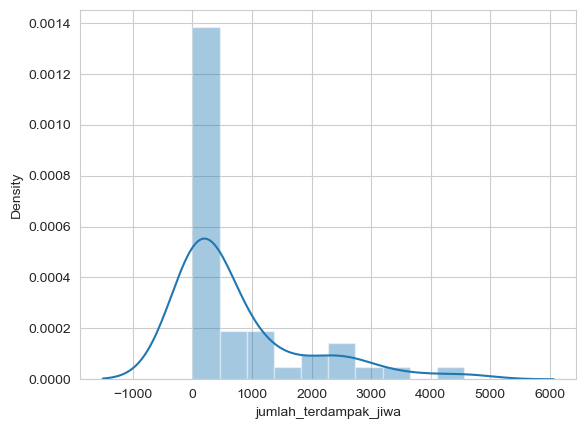

In [82]:
sns.distplot(dk_jaktim.jumlah_terdampak_jiwa)

In [83]:
dk_jaksel = data_kejadian[data_kejadian.kota_administrasi == "Jakarta Selatan"]

In [84]:
dk_jaksel

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
55,Jakarta Selatan,CILANDAK,CILANDAK BARAT,"RW 02, 12",2,2,75,300,71 s/d180 cm,tgl. 01 Januari,0,0,0,0,300,2,0,0
56,Jakarta Selatan,CILANDAK,CIPETE SELATAN,RW 07,1,1,16,65,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,65,2,0,0
57,Jakarta Selatan,CILANDAK,LEBAK BULUS,"RW 04, 08",2,2,23,91,31 s/d 70 cm,"tgl. 01, 24, 26 Januari",0,0,0,0,91,1,0,0
58,Jakarta Selatan,CILANDAK,PONDOK LABU,"RW 01, 02, 03, 07, 09, 10",6,6,33,134,31 s/d 70 cm,"tgl. 01, 26 Januari",0,0,0,0,134,5,0,0
59,Jakarta Selatan,JAGAKARSA,JAGAKARSA,"RW 02, 04",2,2,87,235,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,235,1,0,0
60,Jakarta Selatan,JAGAKARSA,TANJUNG BARAT,"RW 01, 04, 05",3,3,0,0,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
61,Jakarta Selatan,JAGAKARSA,CIGANJUR,"RW. 01,05,06",3,5,37,150,30 s/d 100 cm,tgl. 01 Januari,0,0,0,0,150,3,0,0
62,Jakarta Selatan,JAGAKARSA,SRENGSENG SAWAH,RW.08,1,1,91,372,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,372,8,0,0
63,Jakarta Selatan,JAGAKARSA,LENTENG AGUNG,"RW. 01,02,03,07",4,4,122,507,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,507,4,0,0
64,Jakarta Selatan,JAGAKARSA,CIPEDAK,RW.01,1,1,43,175,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,175,1,0,0


In [85]:
dk_jaktim = data_kejadian[data_kejadian.kota_administrasi == "Jakarta Timur"]

In [86]:
dk_jaktim

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,"RW 01, 03, 06, 07, 08",5,7,212,850,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,850,3,0,0
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,"RW 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",12,12,160,658,10 s/d 70 cm,tgl. 02 Januari,0,0,0,0,658,0,0,0
106,Jakarta Timur,CAKUNG,PENGGILINGAN,"RW 04, 06, 07",3,3,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
107,Jakarta Timur,CAKUNG,RAWA TERATE,"RW 04, 05",2,3,48,195,10 s/d 200 cm,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,RW 01,1,3,23,70,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
109,Jakarta Timur,CAKUNG,JATINEGARA,"RW. 02,03,05,06,07,09,010,12,13,14",10,10,38,150,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,150,0,0,0
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,"RW 01, 02, 03, 05",4,9,12,48,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,48,2,0,0
111,Jakarta Timur,CIPAYUNG,CEGER,"RW 01,02,05",3,3,20,80,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,80,1,0,0
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,"RW 03, 04, 06, 07",4,7,64,190,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,"RW 03, 12",2,5,0,0,71 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0


In [87]:
dk_jaktim['max_tinggi_air']  = dk_jaktim.ketinggian_air.str.extract(r'(\d+)\scm')

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_35690/591480147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_jaktim['max_tinggi_air']  = dk_jaktim.ketinggian_air.str.extract(r'(\d+)\scm')


In [88]:
dk_jaktim.max_tinggi_air

104    150
105     70
106     30
107    200
108     70
109     30
110    150
111     70
112    150
113    150
114    150
115     70
116    150
117    200
118     70
119    150
120    150
121    150
122    170
123     30
124    200
125    150
126    150
127    350
128     70
129    150
130    150
131    200
132    200
133    150
134    150
135    150
136    220
137    150
138     70
139    150
140     70
141    150
142     70
143     70
144     70
145     30
146    150
147     70
148     70
149    150
Name: max_tinggi_air, dtype: object

In [89]:
dk_jaktim['min_tinggi_air']  = dk_jaktim.ketinggian_air.str.extract(r'(\d+)\ss/d')

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_35690/3171481704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_jaktim['min_tinggi_air']  = dk_jaktim.ketinggian_air.str.extract(r'(\d+)\ss/d')


In [90]:
dk_jaktim

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,"RW 01, 03, 06, 07, 08",5,7,212,850,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,850,3,0,0,150,31
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,"RW 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",12,12,160,658,10 s/d 70 cm,tgl. 02 Januari,0,0,0,0,658,0,0,0,70,10
106,Jakarta Timur,CAKUNG,PENGGILINGAN,"RW 04, 06, 07",3,3,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,30,10
107,Jakarta Timur,CAKUNG,RAWA TERATE,"RW 04, 05",2,3,48,195,10 s/d 200 cm,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0,200,10
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,RW 01,1,3,23,70,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,70,31
109,Jakarta Timur,CAKUNG,JATINEGARA,"RW. 02,03,05,06,07,09,010,12,13,14",10,10,38,150,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,150,0,0,0,30,10
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,"RW 01, 02, 03, 05",4,9,12,48,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,48,2,0,0,150,31
111,Jakarta Timur,CIPAYUNG,CEGER,"RW 01,02,05",3,3,20,80,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,80,1,0,0,70,31
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,"RW 03, 04, 06, 07",4,7,64,190,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,31
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,"RW 03, 12",2,5,0,0,71 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,71


In [91]:
dk_jaktim_dt = dk_jaktim.drop(columns=['ketinggian_air'])

In [92]:
dk_jaktim_dt

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,"RW 01, 03, 06, 07, 08",5,7,212,850,tgl. 01 Januari,0,0,0,0,850,3,0,0,150,31
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,"RW 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",12,12,160,658,tgl. 02 Januari,0,0,0,0,658,0,0,0,70,10
106,Jakarta Timur,CAKUNG,PENGGILINGAN,"RW 04, 06, 07",3,3,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,30,10
107,Jakarta Timur,CAKUNG,RAWA TERATE,"RW 04, 05",2,3,48,195,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0,200,10
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,RW 01,1,3,23,70,tgl. 01 Januari,0,0,0,0,0,0,0,0,70,31
109,Jakarta Timur,CAKUNG,JATINEGARA,"RW. 02,03,05,06,07,09,010,12,13,14",10,10,38,150,tgl. 01 Januari,0,0,0,0,150,0,0,0,30,10
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,"RW 01, 02, 03, 05",4,9,12,48,tgl. 01 Januari,0,0,0,0,48,2,0,0,150,31
111,Jakarta Timur,CIPAYUNG,CEGER,"RW 01,02,05",3,3,20,80,tgl. 01 Januari,0,0,0,0,80,1,0,0,70,31
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,"RW 03, 04, 06, 07",4,7,64,190,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,31
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,"RW 03, 12",2,5,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,71


In [93]:
dk_jaktim_no_rw = dk_jaktim_dt.drop(columns='rw')

In [94]:
dk_jaktim_no_rw['lama_kejadian'] = dk_jaktim_no_rw.tanggal_kejadian.str.count(r'(\d+,*)')

In [95]:
dk_jaktim_no_rw

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,5,7,212,850,tgl. 01 Januari,0,0,0,0,850,3,0,0,150,31,1
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,12,12,160,658,tgl. 02 Januari,0,0,0,0,658,0,0,0,70,10,1
106,Jakarta Timur,CAKUNG,PENGGILINGAN,3,3,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,30,10,1
107,Jakarta Timur,CAKUNG,RAWA TERATE,2,3,48,195,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0,200,10,3
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,1,3,23,70,tgl. 01 Januari,0,0,0,0,0,0,0,0,70,31,1
109,Jakarta Timur,CAKUNG,JATINEGARA,10,10,38,150,tgl. 01 Januari,0,0,0,0,150,0,0,0,30,10,1
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,4,9,12,48,tgl. 01 Januari,0,0,0,0,48,2,0,0,150,31,1
111,Jakarta Timur,CIPAYUNG,CEGER,3,3,20,80,tgl. 01 Januari,0,0,0,0,80,1,0,0,70,31,1
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,4,7,64,190,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,31,1
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,2,5,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,71,1


In [96]:
# 1. Basic information about data - EDA
dk_jaktim_no_rw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 104 to 149
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           46 non-null     object
 1   kecamatan                   46 non-null     object
 2   kelurahan                   46 non-null     object
 3   jumlah_terdampak_rw         46 non-null     int64 
 4   jumlah_terdampak_rt         46 non-null     int64 
 5   jumlah_terdampak_kk         46 non-null     int64 
 6   jumlah_terdampak_jiwa       46 non-null     int64 
 7   tanggal_kejadian            46 non-null     object
 8   lama_genangan               46 non-null     int64 
 9   jumlah_meninggal            46 non-null     int64 
 10  jumlah_hilang               46 non-null     int64 
 11  jumlah_luka_berat           46 non-null     int64 
 12  jumlah_luka_ringan          46 non-null     int64 
 13  jumlah_pengungsi_tertinggi  46 non-null     int64

In [97]:
dk_jaktim_no_rw['max_tinggi_air'] = pd.to_numeric(dk_jaktim_no_rw['max_tinggi_air'])
dk_jaktim_no_rw['min_tinggi_air'] = pd.to_numeric(dk_jaktim_no_rw['min_tinggi_air'])


In [98]:
# 1. Basic information about data - EDA
dk_jaktim_no_rw.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0,46.0,46.000000,46.000000,46.0,46.0,46.000000,46.000000,46.000000
mean,4.565217,9.956522,218.543478,751.260870,0.086957,0.0,0.0,0.0,519.173913,2.521739,0.0,0.0,128.695652,35.021739,1.326087
std,2.918540,9.251922,316.945330,1077.271274,0.354406,0.0,0.0,0.0,761.429191,3.132192,0.0,0.0,62.844029,23.977294,0.668476
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,30.000000,10.000000,1.000000
25%,2.000000,3.000000,21.500000,72.500000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,70.000000,10.000000,1.000000
50%,4.000000,7.000000,66.500000,220.000000,0.000000,0.0,0.0,0.0,140.000000,1.000000,0.0,0.0,150.000000,31.000000,1.000000
75%,6.000000,11.750000,306.750000,944.750000,0.000000,0.0,0.0,0.0,562.000000,3.750000,0.0,0.0,150.000000,31.000000,1.000000
max,12.000000,36.000000,1140.000000,4560.000000,2.000000,0.0,0.0,0.0,2738.000000,11.000000,0.0,0.0,350.000000,100.000000,4.000000


In [99]:
#Datatypes; Know the datatypes

dk_jaktim_no_rw.dtypes

kota_administrasi             object
kecamatan                     object
kelurahan                     object
jumlah_terdampak_rw            int64
jumlah_terdampak_rt            int64
jumlah_terdampak_kk            int64
jumlah_terdampak_jiwa          int64
tanggal_kejadian              object
lama_genangan                  int64
jumlah_meninggal               int64
jumlah_hilang                  int64
jumlah_luka_berat              int64
jumlah_luka_ringan             int64
jumlah_pengungsi_tertinggi     int64
jumlah_tempat_pengungsian      int64
nilai_kerugian                 int64
max_tinggi_air                 int64
min_tinggi_air                 int64
lama_kejadian                  int64
dtype: object

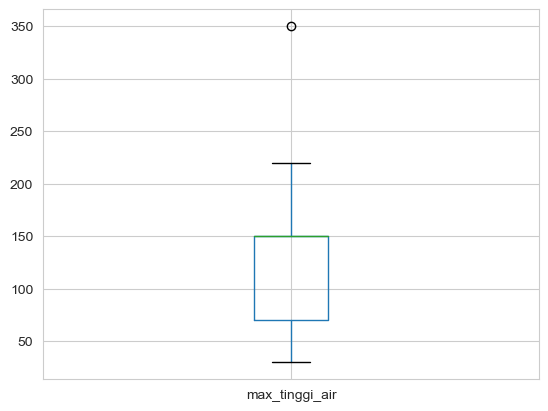

In [100]:
dk_jaktim_no_rw[['max_tinggi_air']].boxplot()

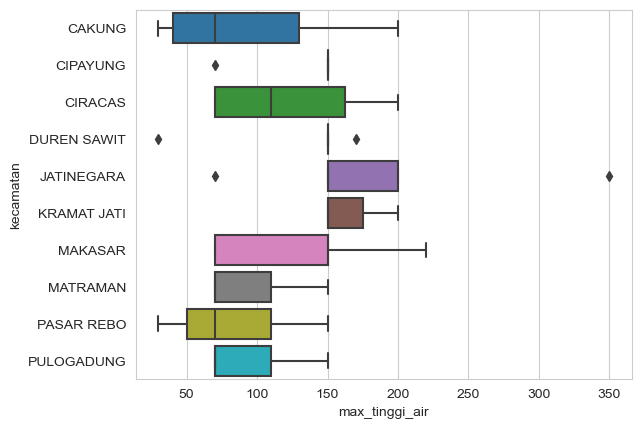

In [101]:
sns.boxplot(data=dk_jaktim_no_rw, x="max_tinggi_air", y="kecamatan")

In [102]:
dkj_jati = dk_jaktim_no_rw[dk_jaktim_no_rw["kecamatan"] == "JATINEGARA"]

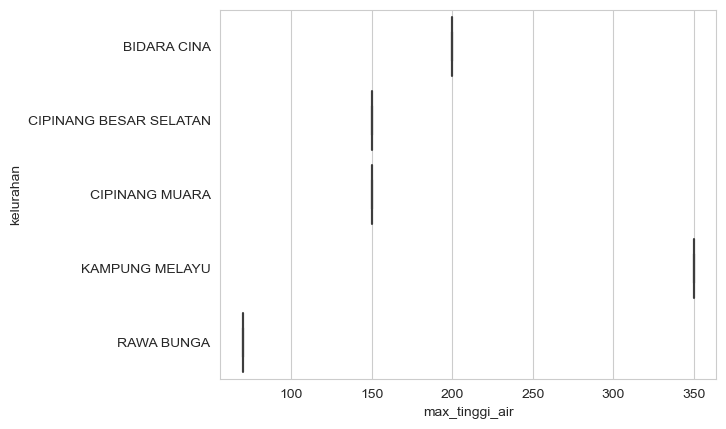

In [103]:
sns.boxplot(data=dkj_jati, x="max_tinggi_air", y="kelurahan")

In [104]:
dk_jaktim_no_rw.corr()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
jumlah_terdampak_rw,1.000000,0.618166,0.338561,0.298490,0.187754,NaN,NaN,NaN,0.465397,0.236858,NaN,NaN,0.264602,-0.328216,0.302091
jumlah_terdampak_rt,0.618166,1.000000,0.687162,0.636767,0.028288,NaN,NaN,NaN,0.213518,0.408761,NaN,NaN,0.293430,-0.202347,0.225116
jumlah_terdampak_kk,0.338561,0.687162,1.000000,0.971379,0.136669,NaN,NaN,NaN,0.397812,0.423610,NaN,NaN,0.244080,-0.103953,0.377154
jumlah_terdampak_jiwa,0.298490,0.636767,0.971379,1.000000,0.169083,NaN,NaN,NaN,0.439536,0.451645,NaN,NaN,0.241728,-0.071143,0.410453
lama_genangan,0.187754,0.028288,0.136669,0.169083,1.000000,NaN,NaN,NaN,0.313197,0.158409,NaN,NaN,0.224711,-0.151902,0.440450
jumlah_meninggal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_hilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_luka_berat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_luka_ringan,0.465397,0.213518,0.397812,0.439536,0.313197,NaN,NaN,NaN,1.000000,0.643610,NaN,NaN,0.528457,0.045424,0.601723
jumlah_pengungsi_tertinggi,0.236858,0.408761,0.423610,0.451645,0.158409,NaN,NaN,NaN,0.643610,1.000000,NaN,NaN,0.536399,0.195729,0.436994


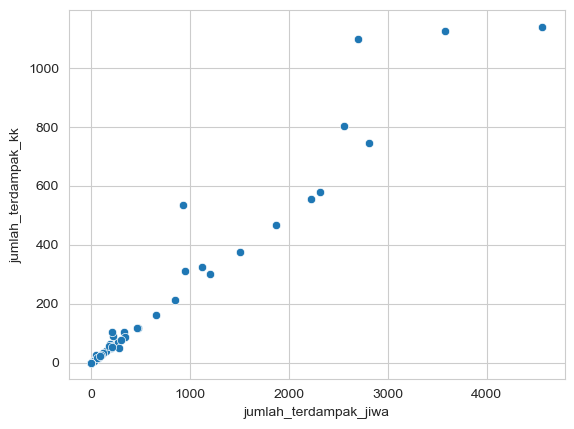

In [105]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_terdampak_jiwa", y="jumlah_terdampak_kk")

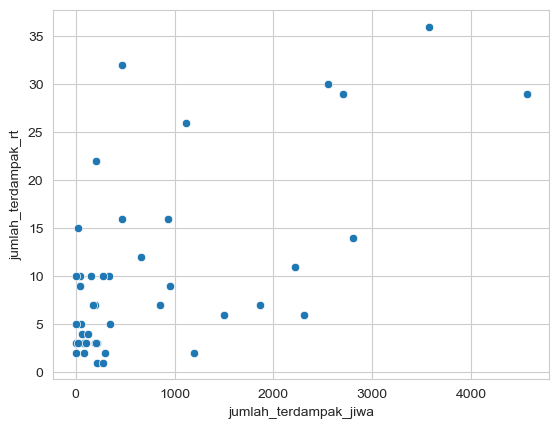

In [106]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_terdampak_jiwa", y="jumlah_terdampak_rt")

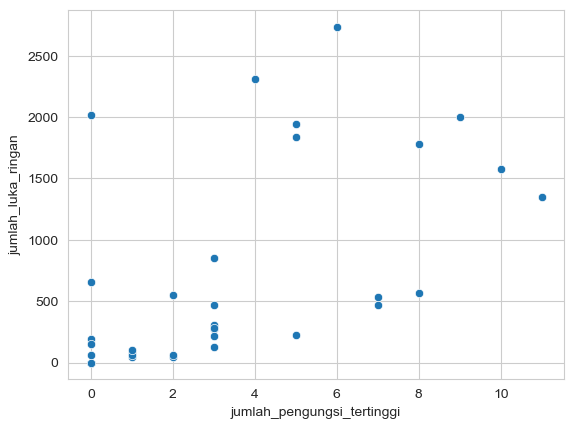

In [107]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_pengungsi_tertinggi", y="jumlah_luka_ringan")

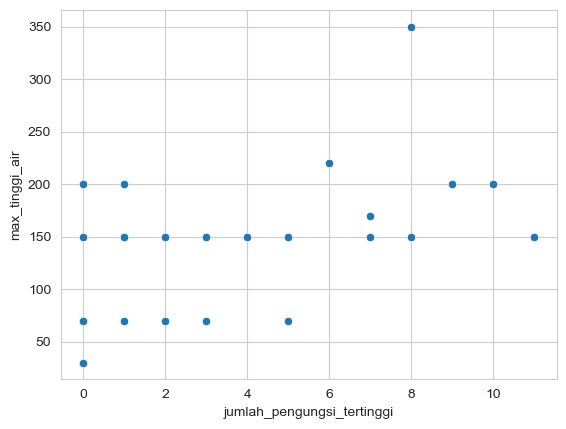

In [108]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_pengungsi_tertinggi", y="max_tinggi_air")

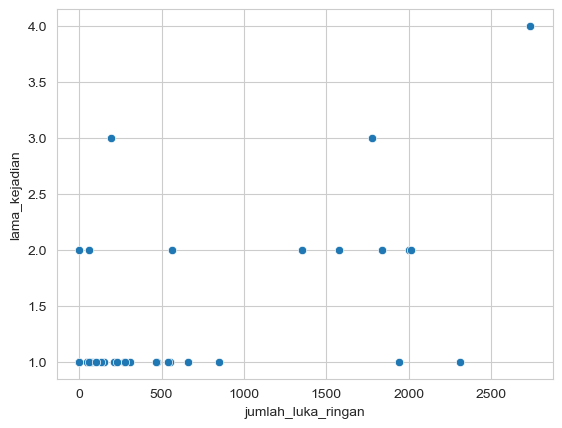

In [109]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_luka_ringan", y="lama_kejadian")

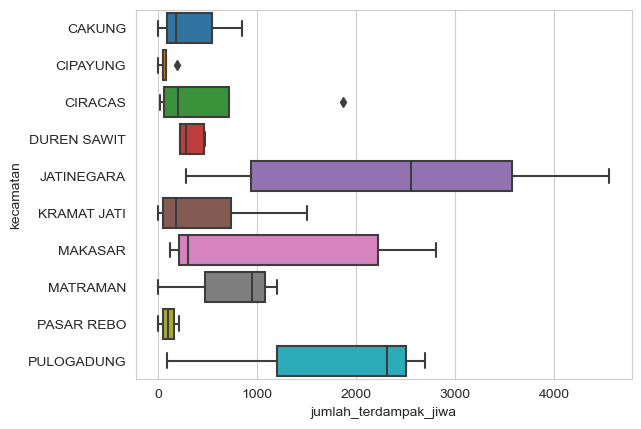

In [110]:
sns.boxplot(data=dk_jaktim_no_rw, x="jumlah_terdampak_jiwa", y="kecamatan")

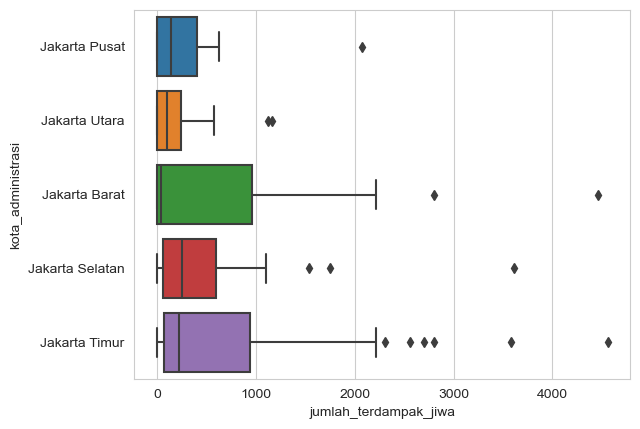

In [111]:
sns.boxplot(data=data_kejadian, x="jumlah_terdampak_jiwa", y="kota_administrasi")

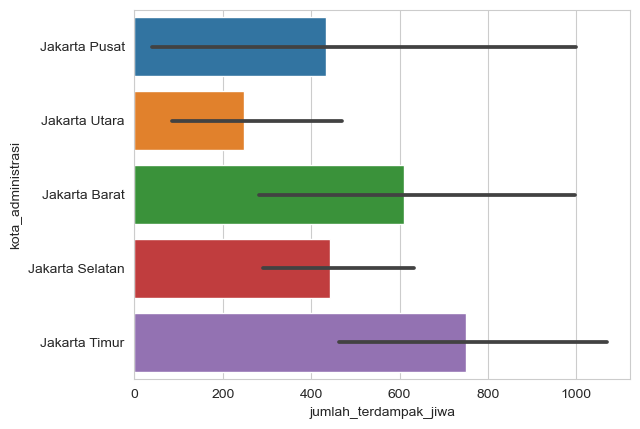

In [112]:
sns.barplot(data=data_kejadian, x="jumlah_terdampak_jiwa", y="kota_administrasi")

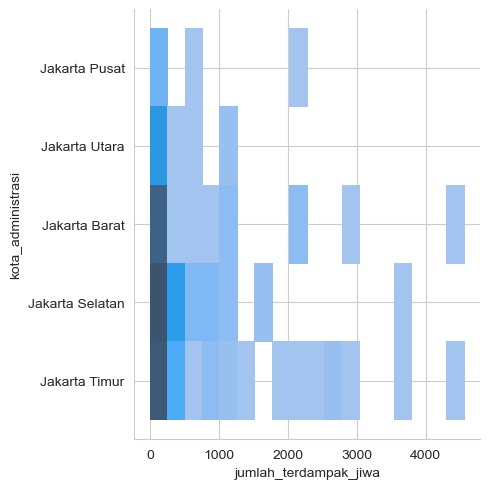

In [113]:
sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa", y="kota_administrasi")

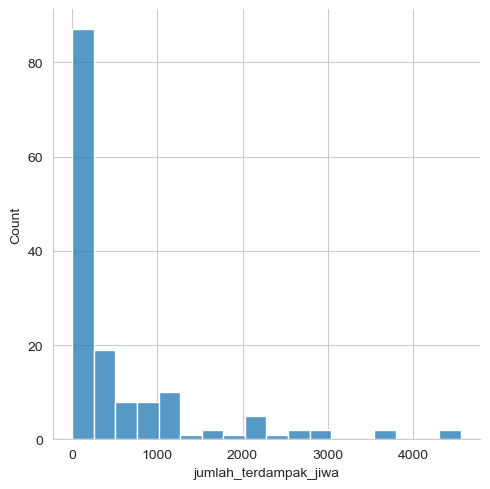

In [114]:
sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa")

In [115]:
dk_jaktim_no_rw

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,5,7,212,850,tgl. 01 Januari,0,0,0,0,850,3,0,0,150,31,1
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,12,12,160,658,tgl. 02 Januari,0,0,0,0,658,0,0,0,70,10,1
106,Jakarta Timur,CAKUNG,PENGGILINGAN,3,3,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,30,10,1
107,Jakarta Timur,CAKUNG,RAWA TERATE,2,3,48,195,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0,200,10,3
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,1,3,23,70,tgl. 01 Januari,0,0,0,0,0,0,0,0,70,31,1
109,Jakarta Timur,CAKUNG,JATINEGARA,10,10,38,150,tgl. 01 Januari,0,0,0,0,150,0,0,0,30,10,1
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,4,9,12,48,tgl. 01 Januari,0,0,0,0,48,2,0,0,150,31,1
111,Jakarta Timur,CIPAYUNG,CEGER,3,3,20,80,tgl. 01 Januari,0,0,0,0,80,1,0,0,70,31,1
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,4,7,64,190,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,31,1
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,2,5,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,71,1


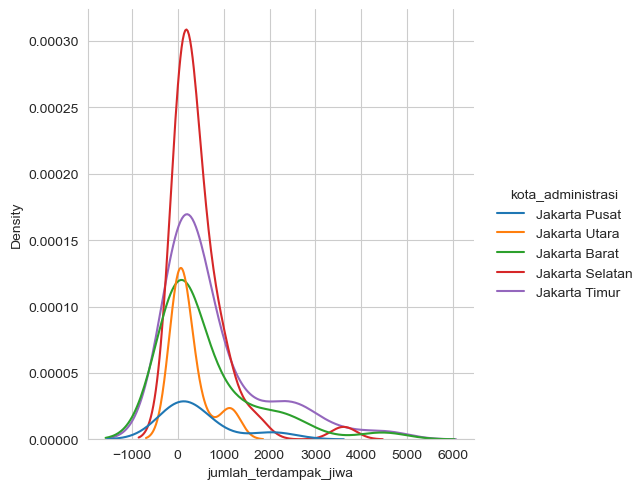

In [116]:
# sns.distplot(dk_jaktim_no_rw, x="jumlah_terdampak_jiwa")
sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa", hue="kota_administrasi", kind="kde")

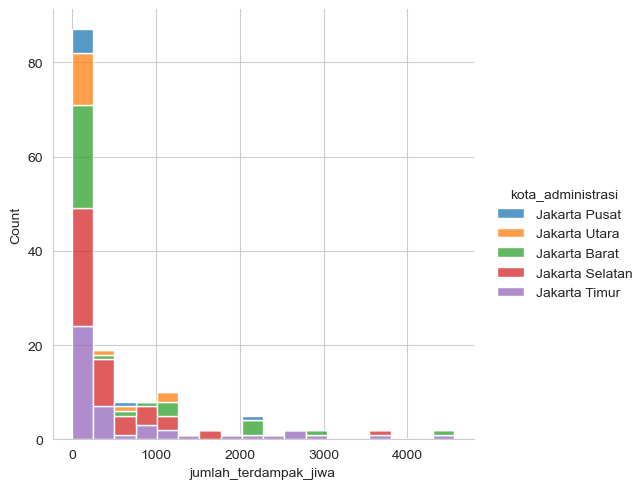

In [117]:
sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa", hue="kota_administrasi",multiple="stack")

In [118]:
data_kejadian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           150 non-null    object
 1   kecamatan                   150 non-null    object
 2   kelurahan                   150 non-null    object
 3   rw                          150 non-null    object
 4   jumlah_terdampak_rw         150 non-null    int64 
 5   jumlah_terdampak_rt         150 non-null    int64 
 6   jumlah_terdampak_kk         150 non-null    int64 
 7   jumlah_terdampak_jiwa       150 non-null    int64 
 8   ketinggian_air              150 non-null    object
 9   tanggal_kejadian            150 non-null    object
 10  lama_genangan               150 non-null    int64 
 11  jumlah_meninggal            150 non-null    int64 
 12  jumlah_hilang               150 non-null    int64 
 13  jumlah_luka_berat           150 non-null    int64 

In [119]:
data_kejadian['max_tinggi_air']  = data_kejadian.ketinggian_air.str.extract(r'(\d+)\scm')
data_kejadian['min_tinggi_air']  = data_kejadian.ketinggian_air.str.extract(r'(\d+)\ss/d')
data_kejadian['lama_kejadian'] = data_kejadian.tanggal_kejadian.str.count(r'(\d+,*)')


data_kejadian['max_tinggi_air'] = pd.to_numeric(data_kejadian['max_tinggi_air'])
data_kejadian['min_tinggi_air'] = pd.to_numeric(data_kejadian['min_tinggi_air'])
data_kejadian['lama_kejadian'] = pd.to_numeric(data_kejadian['lama_kejadian'])


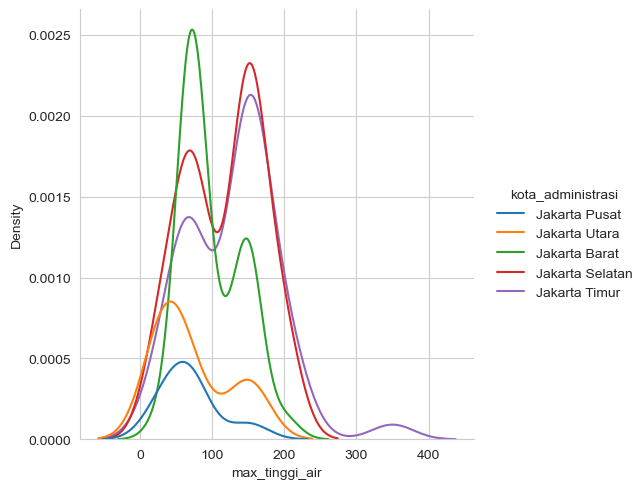

In [120]:
sns.displot(data=data_kejadian, x="max_tinggi_air", hue="kota_administrasi", kind="kde")

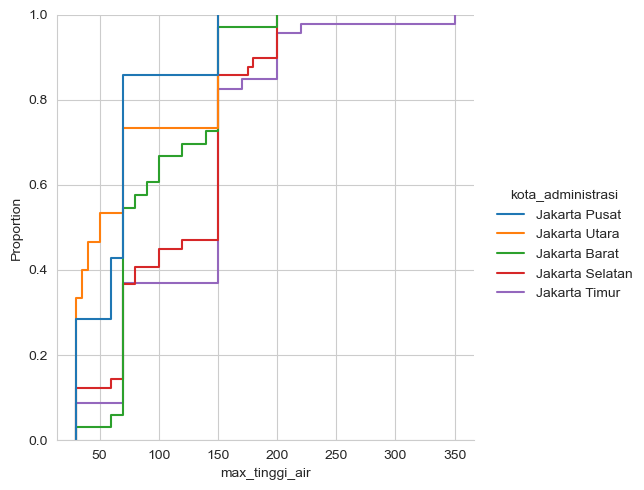

In [121]:
sns.displot(data=data_kejadian, x="max_tinggi_air", hue="kota_administrasi", kind="ecdf")

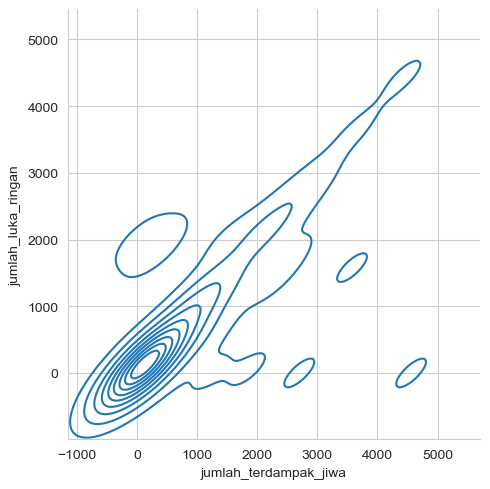

In [122]:
# jumlah_terdampak_jiwa jumlah_luka_ringan

sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa", y="jumlah_luka_ringan", kind="kde")

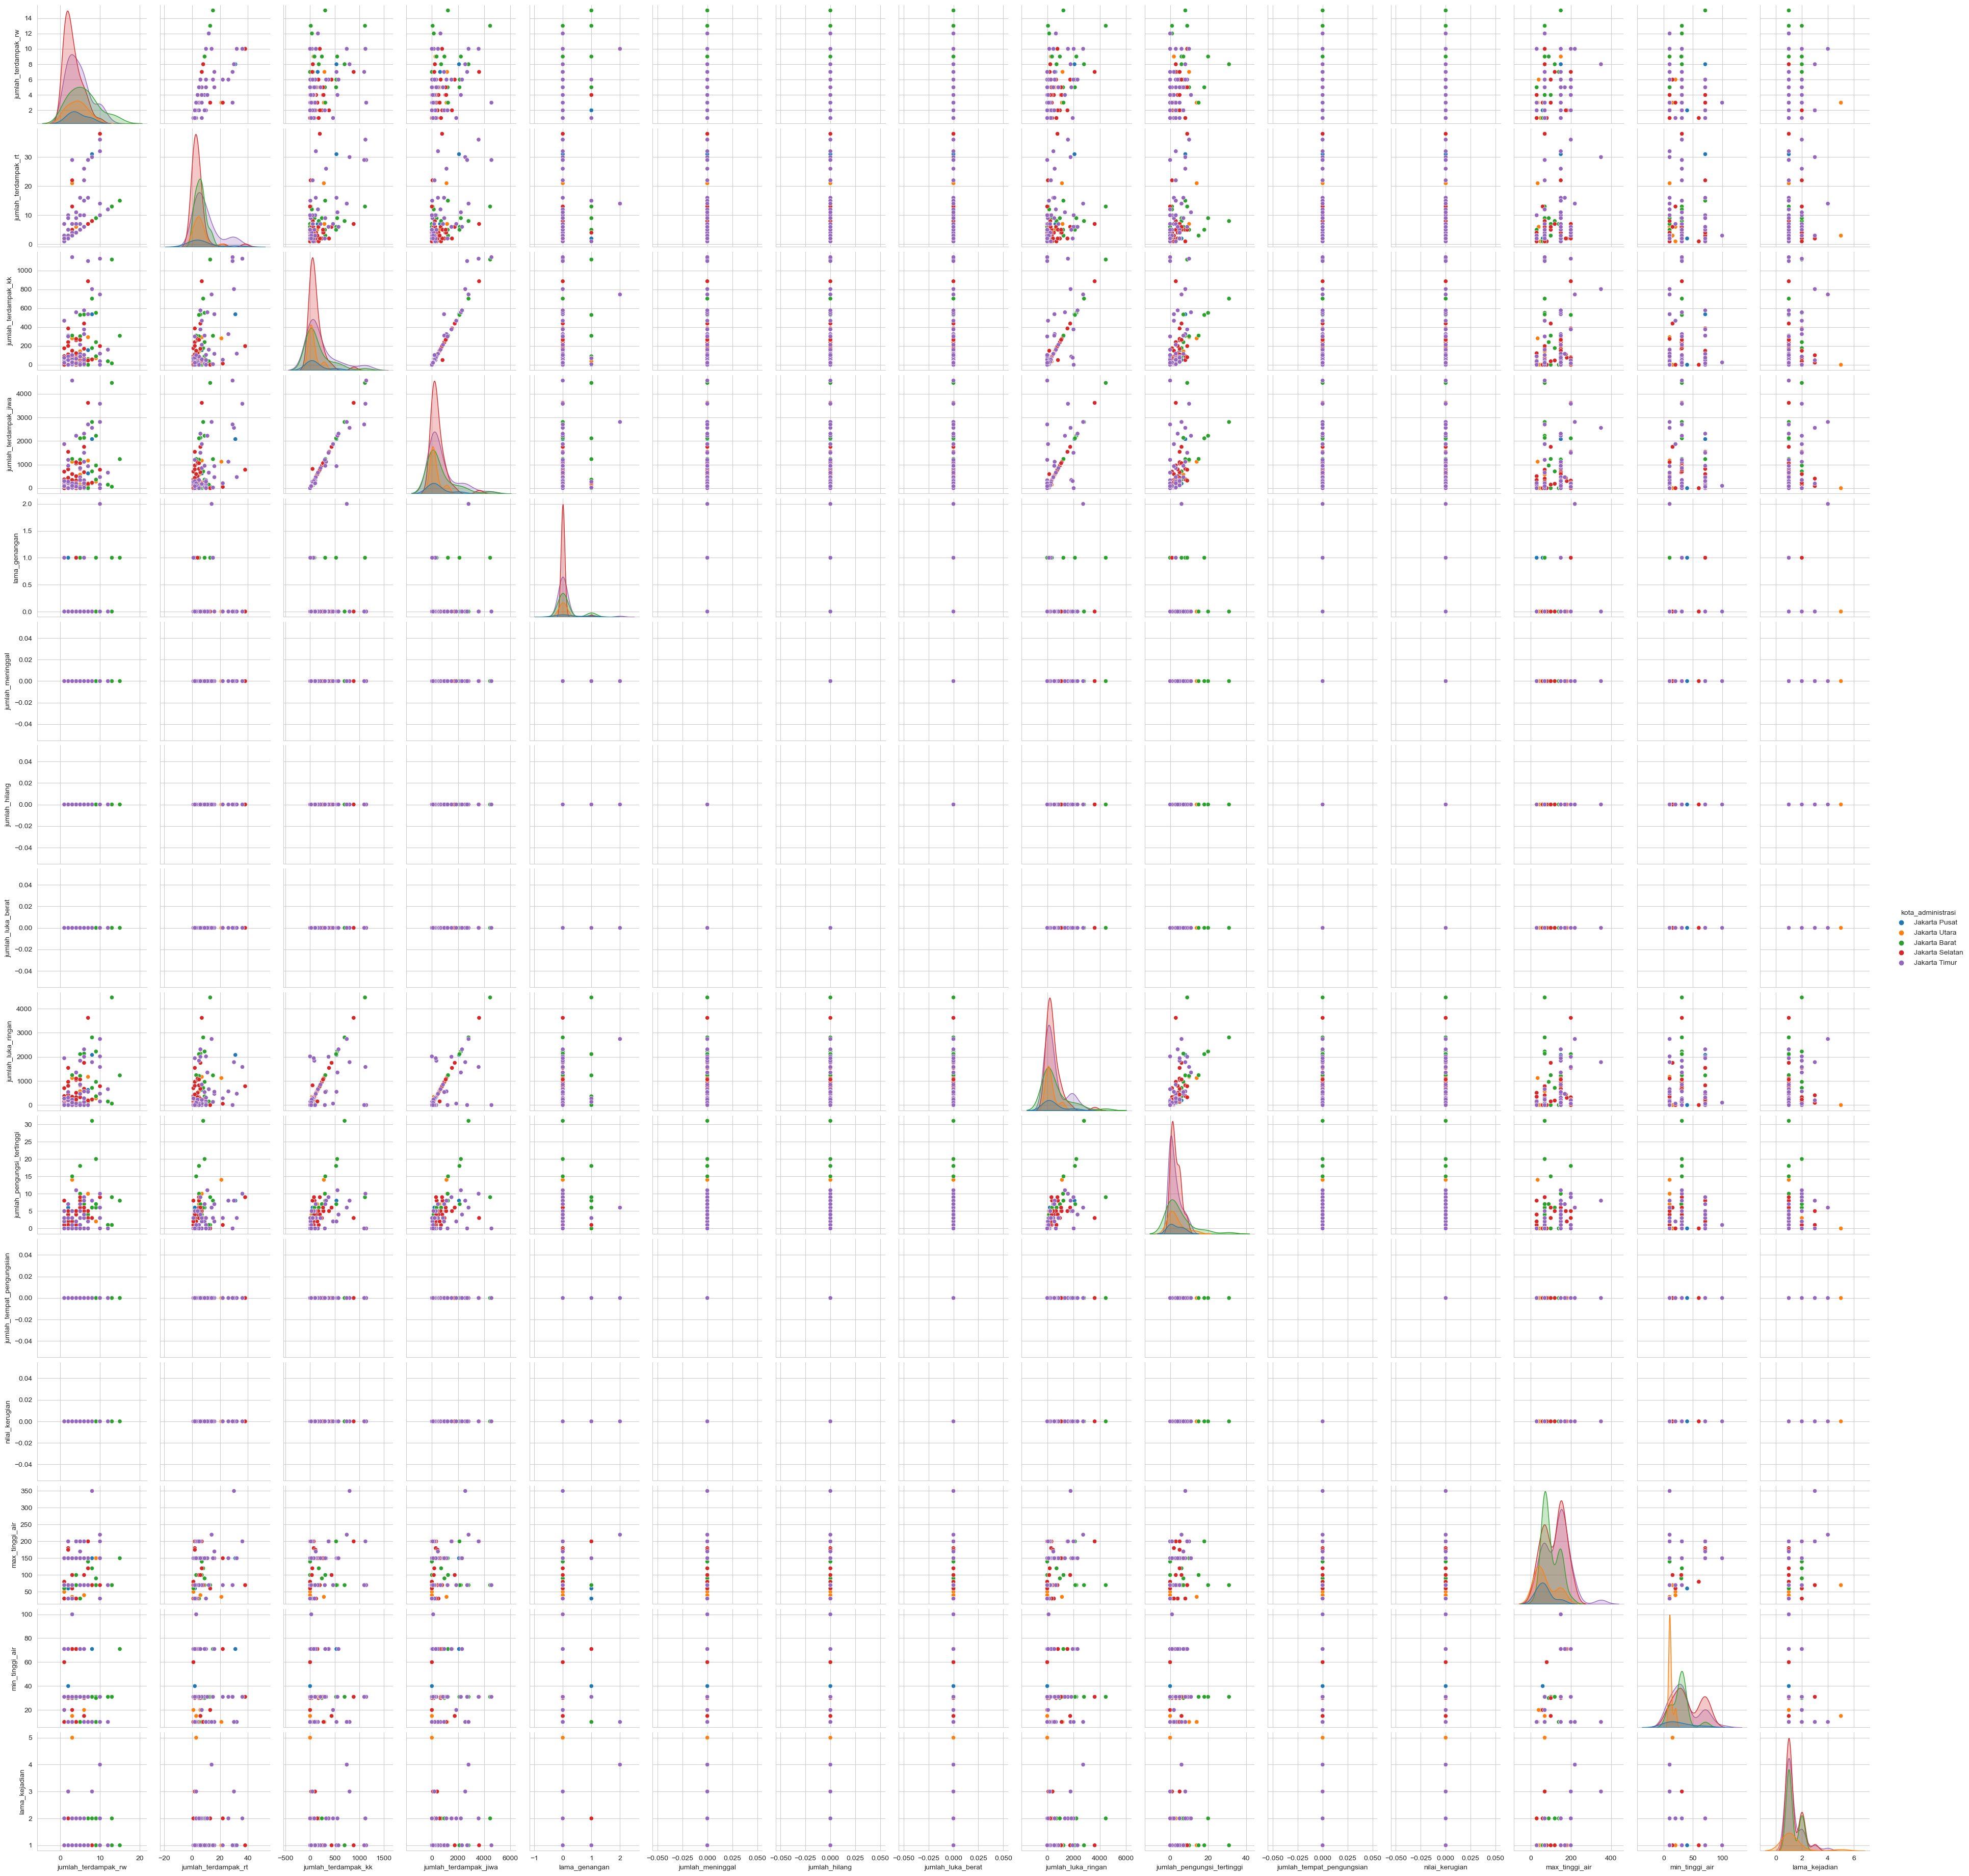

In [123]:
sns.pairplot(data=data_kejadian, hue="kota_administrasi")

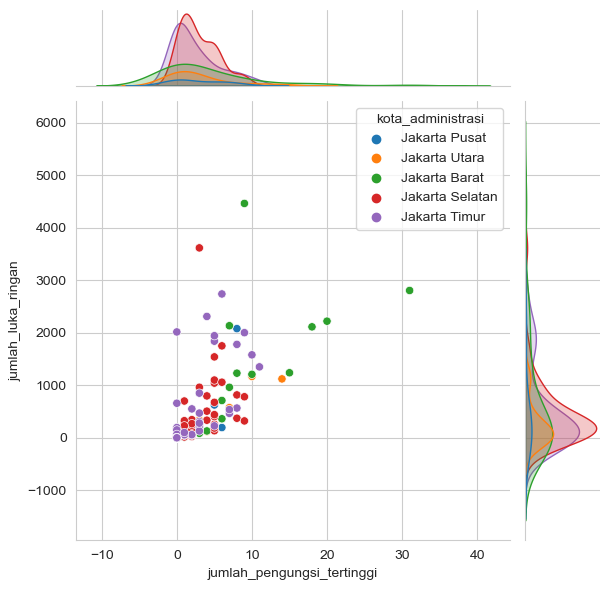

In [124]:
sns.jointplot(data=data_kejadian, x="jumlah_pengungsi_tertinggi", y="jumlah_luka_ringan", hue="kota_administrasi")

# Finding kecamatan with the highest jiwa terdampak

In [125]:
data_kejadian

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,140,1,0,0,30,10.0,1
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,10.0,1
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,30,10.0,1
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,...,0,0,0,625,5,0,0,70,10.0,1
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,195,6,0,0,70,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Jakarta Timur,PASAR REBO,PEKAYON,"RW 02, 08",2,2,0,0,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,30,10.0,1
146,Jakarta Timur,PASAR REBO,GEDONG,"RW. 01, 03, 11",3,3,25,100,100 s/d 150 cm,tgl. 01 Januari,...,0,0,0,100,1,0,0,150,100.0,1
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1
148,Jakarta Timur,PULOGADUNG,JATI,RW 08,1,2,21,84,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1


In [126]:
data_kejadian_terdampak_kec_group = data_kejadian.groupby(['kecamatan'])['jumlah_terdampak_jiwa'].sum().nlargest(10)
data_kejadian_terdampak_kec_group
data_kejadian_terdampak_kec_group.index

Index(['CENGKARENG', 'JATINEGARA', 'PANCORAN', 'MAKASAR', 'PULOGADUNG',
       'MAMPANG PRAPATAN', 'KALIDERES', 'KRAMAT JATI', 'KEBAYORAN LAMA',
       'CIRACAS'],
      dtype='object', name='kecamatan')

In [127]:
data_kejadian_select = data_kejadian.loc[data_kejadian['kecamatan'].isin(data_kejadian_terdampak_kec_group.index)]
data_kejadian_terdampak_kec_mean = data_kejadian_select.groupby(['kecamatan'])['jumlah_terdampak_jiwa'].mean().nlargest(10)

In [128]:
data_kejadian_terdampak_kec_mean.index

Index(['JATINEGARA', 'CENGKARENG', 'PULOGADUNG', 'MAKASAR', 'PANCORAN',
       'MAMPANG PRAPATAN', 'KALIDERES', 'CIRACAS', 'KRAMAT JATI',
       'KEBAYORAN LAMA'],
      dtype='object', name='kecamatan')

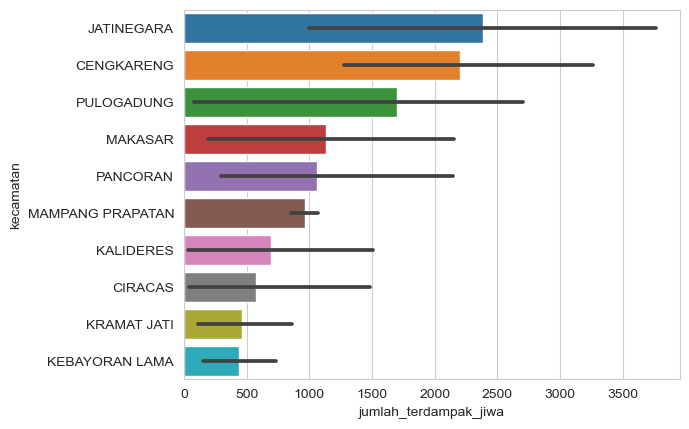

In [129]:
ax = sns.barplot(data=data_kejadian_select, x="jumlah_terdampak_jiwa", y='kecamatan', order=data_kejadian_terdampak_kec_mean.index)

## Based on Kelurahan

In [130]:
data_kejadian_kel_sort = data_kejadian_select.sort_values(by=["jumlah_terdampak_jiwa"], ascending=False).head(10)

In [131]:
data_kejadian_kel_sort

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
128,Jakarta Timur,JATINEGARA,RAWA BUNGA,"RW 04, 05, 06",3,29,1140,4560,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1
25,Jakarta Barat,CENGKARENG,KAPUK,"RW 02, 03, 04, 05, 06, 07, 08, 09, 10, 12, 13,...",13,13,1115,4461,31 s/d 70 cm,"tgl. 01, 24 Januari",...,0,0,0,4461,9,0,0,70,31.0,2
83,Jakarta Selatan,PANCORAN,KALIBATA,"RW 01, 04, 05, 06, 08, 09, 10",7,7,885,3615,31 s/d 200 cm,tgl. 01 Januari,...,0,0,0,3615,3,0,0,200,31.0,1
124,Jakarta Timur,JATINEGARA,BIDARA CINA,"RW 03, 04, 05, 06, 07, 11, 12, 14, 15, 16",10,36,1124,3577,31 s/d 200 cm,"tgl. 01, 09 Januari",...,0,0,0,1579,10,0,0,200,31.0,2
136,Jakarta Timur,MAKASAR,CIPINANG MELAYU,"RW 02, 03, 04, 05, 06, 08, 10,11, 12,13",10,14,745,2806,10 s/d 220 cm,"tgl. 01, 18, 20, 24 Januari",...,0,0,0,2738,6,0,0,220,10.0,4
26,Jakarta Barat,CENGKARENG,KEDAUNG KALI ANGKE,"RW 01, 02, 03, 04, 05, 06, 07, 08",8,8,701,2804,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,2804,31,0,0,70,31.0,1
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1
127,Jakarta Timur,JATINEGARA,KAMPUNG MELAYU,"RW 01, 02, 03, 04, 05, 06, 07, 08",8,30,802,2556,10 s/d 350 cm,"tgl. 01, 09, 18 Januari",...,0,0,0,1778,8,0,0,350,10.0,3
149,Jakarta Timur,PULOGADUNG,KAYU PUTIH,"RW 11, 12, 13, 14, 15, 16",6,6,577,2310,71 s/d 150 cm,tgl. 01 Januari,...,0,0,0,2310,4,0,0,150,71.0,1
139,Jakarta Timur,MAKASAR,MAKASAR,"RW 03, 05, 06, 07",4,11,556,2220,31 s/d 150 cm,"tgl. 01, 18 Januari",...,0,0,0,1350,11,0,0,150,31.0,2


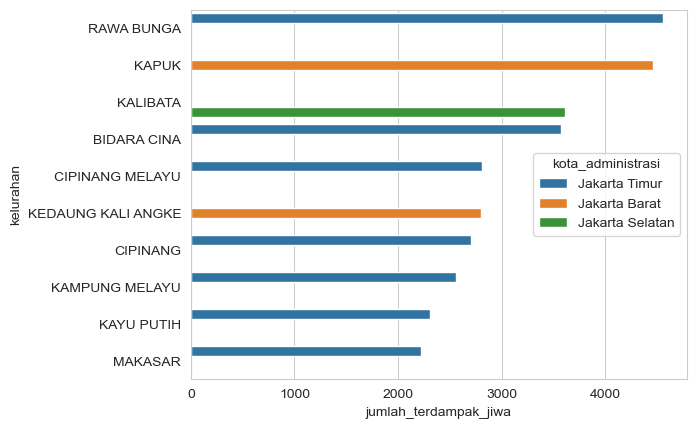

In [132]:
ax = sns.barplot(data=data_kejadian_kel_sort, x="jumlah_terdampak_jiwa", y='kelurahan', hue="kota_administrasi" )

In [133]:
all_rekap['rw_terdampak'] = all_rekap['rw_terdampak'].astype(int)


/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_35690/2087271998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_rekap['rw_terdampak'] = all_rekap['rw_terdampak'].astype(int)


# Heatmap

In [134]:
all_rekap

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
12,2014,1,37,125,10 - 400,20.0,634,70459.0,245950.0,23,0,0,0,122417,434
13,2014,2,21,45,10 - 300,20.0,192,56489.0,164940.0,0,0,0,0,38340,129
14,2014,3,8,18,10 - 200,8.0,89,4925.0,15098.0,0,0,0,0,3479,16
15,2014,4,3,3,10 - 150,2.0,11,1560.0,3553.0,0,0,0,0,0,0
16,2014,5,2,3,10 - 200,4.0,16,2535.0,6327.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020,8,10,12,10 s.d 80 cm,1,20,0,0,0,0,0,0,0,0
91,2020,9,16,28,10 s.d 130 cm,2,65,414,1300,0,0,0,0,104,5
92,2020,10,29,72,10 s.d 180 cm,2,170,1933,6250,0,0,0,0,675,12
93,2020,11,16,27,10 s.d 60 cm,2,54,0,0,0,0,0,0,0,0


In [135]:
all_rekap = all_rekap[all_rekap.tahun != 2013]


# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "rw_terdampak")

In [136]:
sdfd

tahun,2014,2015,2016,2017,2018,2019,2020
bulan,,,,,,,
1,634.0,221.0,26.0,7.0,25.0,58.0,390.0
2,192.0,615.0,231.0,216.0,162.0,43.0,581.0
3,89.0,30.0,93.0,95.0,21.0,119.0,104.0
4,11.0,18.0,134.0,78.0,19.0,94.0,106.0
5,16.0,7.0,26.0,48.0,47.0,15.0,47.0
6,7.0,0.0,49.0,17.0,18.0,0.0,46.0
7,41.0,0.0,59.0,22.0,0.0,0.0,4.0
8,21.0,0.0,82.0,13.0,0.0,0.0,20.0
9,0.0,0.0,72.0,2.0,0.0,0.0,65.0


ValueError: Unknown format code 's' for object of type 'float'

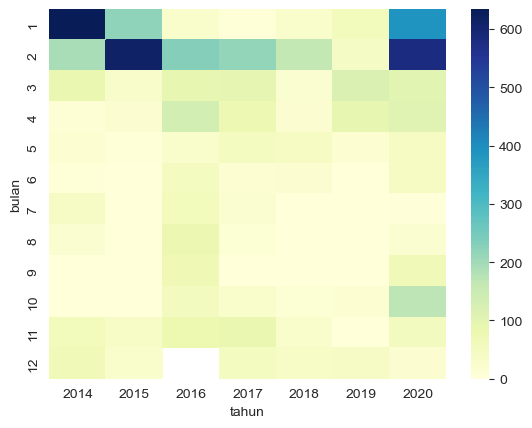

In [137]:
sns.heatmap(sdfd, annot=True, fmt="s",  cmap="YlGnBu")

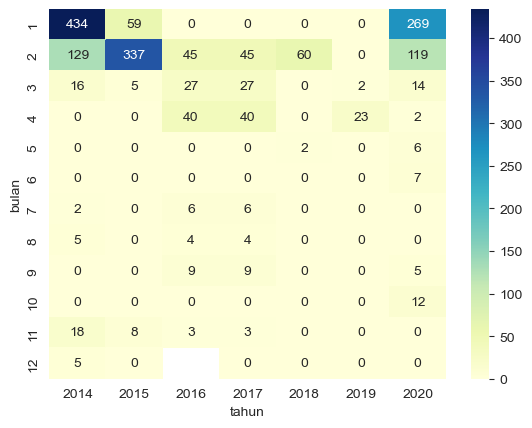

In [138]:
all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "jumlah_tempat_pengungsian")
sns.heatmap(sdfd, annot=True, fmt=".3g" , cmap="YlGnBu")

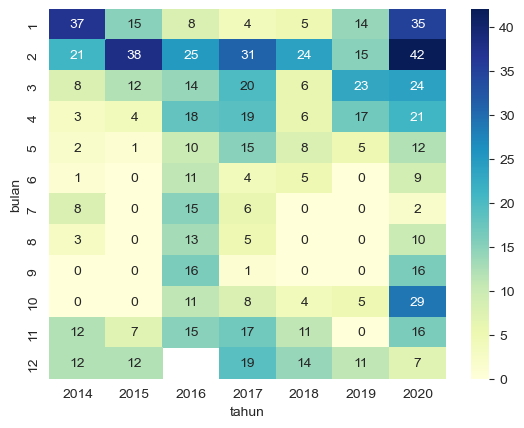

In [139]:
all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "kecamatan")
sns.heatmap(sdfd, annot=True, fmt=".3g" , cmap="YlGnBu")

In [140]:

all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "jiwa_terdampak")
sns.heatmap(sdfd, annot=True, fmt=".3g", cmap="YlGnBu")

ValueError: could not convert string to float: 'n.a'

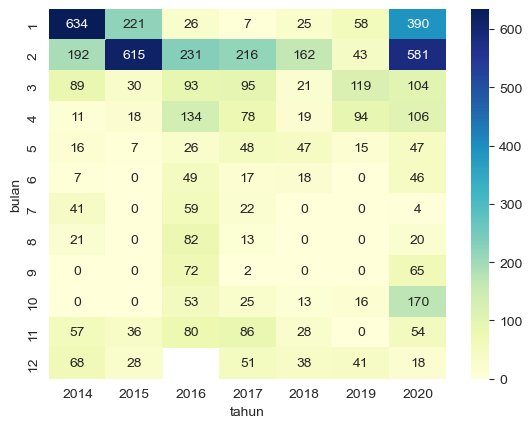

In [141]:

all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "rw_terdampak")
sns.heatmap(sdfd, annot=True, fmt=".3g", cmap="YlGnBu")

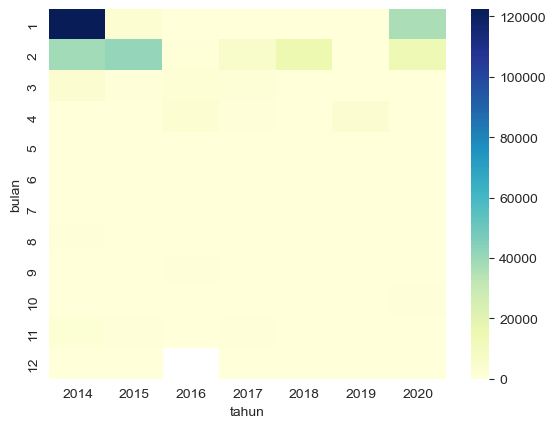

In [142]:

all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "jumlah_jiwa_pengungsi_tertinggi")
sns.heatmap(sdfd,  cmap="YlGnBu")

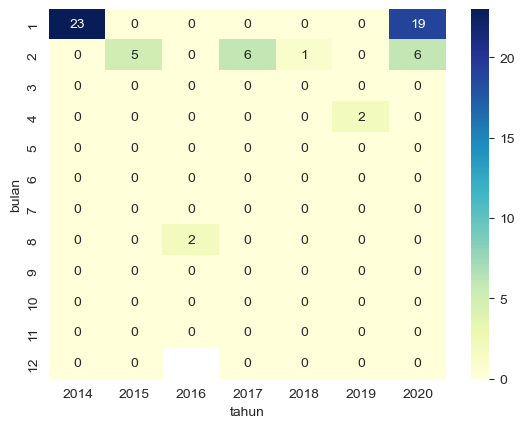

In [143]:
all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "korban_meninggal")
sns.heatmap(sdfd,  annot=True, fmt=".3g",  cmap="YlGnBu")

# Swarm Plot

In [144]:
data_kejadian

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,140,1,0,0,30,10.0,1
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,10.0,1
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,30,10.0,1
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,...,0,0,0,625,5,0,0,70,10.0,1
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,195,6,0,0,70,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Jakarta Timur,PASAR REBO,PEKAYON,"RW 02, 08",2,2,0,0,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,30,10.0,1
146,Jakarta Timur,PASAR REBO,GEDONG,"RW. 01, 03, 11",3,3,25,100,100 s/d 150 cm,tgl. 01 Januari,...,0,0,0,100,1,0,0,150,100.0,1
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1
148,Jakarta Timur,PULOGADUNG,JATI,RW 08,1,2,21,84,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1


/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

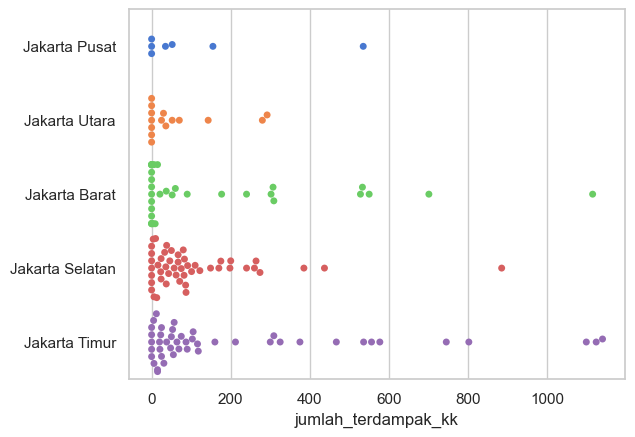

In [145]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=data_kejadian, x="jumlah_terdampak_kk", y="kota_administrasi")
ax.set(ylabel="")

# Daerah Rawan Banjir

In [192]:
# path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"
path_daerah_rawan = "dataset/daerah-rawan-banjir/daerah-rawan-banjir-provinsi-dki-jakarta.csv"
data_rawan = pd.read_csv(path_daerah_rawan)
data_rawan

,kota,kecamatan,kelurahan
0,JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN
1,JAKARTA PUSAT,TANAH ABANG,PETAMBURAN
2,JAKARTA UTARA,CILINCING,CILINCING
3,JAKARTA UTARA,CILINCING,MARUNDA
4,JAKARTA UTARA,CILINCING,SEMPER BARAT
...,...,...,...
77,JAKARTA TIMUR,MAKASAR,MAKASAR
78,JAKARTA TIMUR,MAKASAR,PINANG RANTI
79,JAKARTA TIMUR,MATRAMAN,KEBON MANGGIS
80,JAKARTA TIMUR,PASAR REBO,KALISARI


In [143]:
data_rawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   kota       82 non-null     object
 1   kecamatan  82 non-null     object
 2   kelurahan  82 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [144]:
data_rawan['kecamatan'].value_counts()

CENGKARENG           6
MAKASAR              5
PENJARINGAN          5
MAMPANG PRAPATAN     5
CILINCING            5
KRAMAT JATI          4
JATINEGARA           4
TEBET                3
PESANGGRAHAN         3
KEBAYORAN LAMA       3
CILANDAK             3
PANCORAN             3
KEMBANGAN            3
KEBON JERUK          3
PASAR MINGGU         3
CAKUNG               3
CIRACAS              3
TANAH ABANG          2
KEBAYORAN BARU       2
KALI DERES           2
GROGOL PETAMBURAN    2
KELAPA GADING        2
PASAR REBO           2
TAMAN SARI           1
TANJUNG PRIOK        1
DUREN SAWIT          1
PADEMANGAN           1
KOJA                 1
MATRAMAN             1
Name: kecamatan, dtype: int64

# Data Distribusi logistik januari sd maret

In [139]:
# path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"
path_daerah_logistic = "dataset/daerah-rawan-banjir/data-distribusi-logistik-januari-sd-maret-2019.csv"
data_logistic = pd.read_csv(path_daerah_logistic)

In [140]:
data_logistic

,bulan,jenis_barang,jumlah,satuan,kelurahan,kecamatan,wilayah,sumber_dana_barang
0,1,Sarung,10,lembar,Tambora,Tambora,Jakarta Barat,APBD 2015
1,1,Terpal,32,lembar,Tambora,Tambora,Jakarta Barat,APBD 2016
2,1,Mukena,40,buah,Tambora,Tambora,Jakarta Barat,APBD 2018
3,1,Peralatan Dapur Keluarga,15,paket,Tambora,Tambora,Jakarta Barat,APBN 2016
4,1,Terpal,8,lembar,Tambora,Tambora,Jakarta Barat,APBN 2016
...,...,...,...,...,...,...,...,...
67,3,Paket Lauk Pauk,12,paket,Jati Padang,Pasar Minggu,Jakarta Selatan,APBN 2018
68,3,Matras,6,lembar,Jati Padang,Pasar Minggu,Jakarta Selatan,APBN 2018
69,3,Air Mineral,4,dus,Jati Padang,Pasar Minggu,Jakarta Selatan,APBD 2018
70,3,Biskuit,24,kaleng,Jati Padang,Pasar Minggu,Jakarta Selatan,APBD 2018


# Data Rekapitulasi kejadian banjir 2020

In [134]:
# dataset/daerah-rawan-banjir-dki-jakarta.csv

# path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"
path_data = "dataset/daerah-rawan-banjir-dki-jakarta.csv"
data_rawan_banjir = pd.read_csv(path_data)

data_rawan_banjir

,Wilayah,Kecamatan,Kelurahan,RW
0,Jakarta Pusat,JOHAR BARU,GALUR,RW 05
1,Jakarta Pusat,JOHAR BARU,GALUR,RW 07
2,Jakarta Pusat,KEMAYORAN,CEMPAKA BARU,RW 03
3,Jakarta Pusat,KEMAYORAN,CEMPAKA BARU,RW 04
4,Jakarta Pusat,KEMAYORAN,CEMPAKA BARU,RW 05
...,...,...,...,...
561,Jakarta Timur,PULO GADUNG,PULO GADUNG,RW 06
562,Jakarta Timur,PULO GADUNG,PULO GADUNG,RW 07
563,Jakarta Timur,PULO GADUNG,PULO GADUNG,RW 08
564,Jakarta Timur,PULO GADUNG,PULO GADUNG,RW 09


In [137]:
data_rawan_banjir.Kelurahan.value_counts()

KELAPA GADING TIMUR     19
PEGANGSAAN DUA          18
KAPUK                   16
TANJUNG PRIUK           16
KEBON BAWANG            16
                        ..
CIKOKO                   1
DUREN TIGA               1
JATI PADANG              1
BINTARO                  1
KEBAYORAN LAMA UTARA     1
Name: Kelurahan, Length: 112, dtype: int64

# Data Lokasi Genangan Air Kota Jakarta Barat 2019

In [132]:
# dataset/daerah-rawan-banjir-dki-jakarta.csv

# path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"
path_data = "dataset/data-lokasi-genangan-air-kota-adm-jakarta-barat-tahun-2019.csv"
data = pd.read_csv(path_data,  encoding = 'unicode_escape')

data

,kelurahan,lokasi,ketinggian_air,luas_area_genangan_banjir,penyebab,upaya_penanganan_yang _dilakukan
0,JATIPULO,Jl. Kamboja Raya Depan Wisma Lampung,5-10 cm,80 M2,Tali Tali Air Tersumbat Sampah,Membersihkan Sampah Di Tali-Tali Air dan Air S...
1,JATIPULO,Jl. Kemuning RW 001,10-15 cm,90 M2,Menyempitnya Saluran Air Sehingga Tidak Tertam...,Membersihkan Sampah Di Salurannya Dan Air Suru...
2,JATIPULO,Jl. Bidara Raya RW 002,10-15 cm,100 M2,Menyempitnya Saluran Air Sehingga Tidak Tertam...,Membersihkan Sampah Di Salurannya Dan Air Suru...
3,JATIPULO,Jl. Semangka II,10-15 cm,50 M2,Saluran Tidak Kuat Menahan Debit Air,Membersihkan Sampah Di Salurannya Dan Air Suru...
4,JATIPULO,Jl. Pertigaan Cempaka Atas & Jl. Wijaya Kusuma...,15-25 cm,50 M2,Pendangkalan Saluran PHB,Pengerukan Tanah Di Saluran PHB dan Ari Surut ...
...,...,...,...,...,...,...
67,KEDOYA UTARA,"Jl. Panjang Green Garden, Depan Mc Donald Kel....",10-30 cm,1350 m2,"Curah hujan tinggi, Kawasan Rendah, antrian ai...","Penanganan Oleh PKLG Kec. Kebon Jeruk, Dan Pen..."
68,KEBON JERUK,Jl. Pejuangan Depan Graha Kencana sampai RS Si...,10-20 cm,900 m2,"Curah hujan tinggi, antrian Air Ke PHB Graha R...",Perlu diperbesar Saluran Dari pintu masuk tol ...
69,DURI KEPA,"Jl. Tomang Patra Kel. Duri Kepa, Kebon Jeruk, ...",20-50 cm,3600 m2,"Curah Hujan Tinggi, Kawasannya rendah Antrian ...","Kawasannya rendah, Perbaikan belum tuntas,-Per..."
70,DURI KEPA,"Jl. Panjang Depan Warung Sunda, Duri Kepa, Keb...",10-30 cm,675 m2,"Curah Hujan Tinggi, Penyempitan Saluran Antria...","Penyempitan Saluran dan Kawasan Rendah, Perlu ..."


# Sekolah-rawan-banjir-tahun-2018 [85%]

- hypotesis :
- no date dataset
- jumlah siswa the count of siswa can be indicate how many impacted siswa
- jumlah guru can show something there, need to be change to integer
- latitude and longitude can be use also for that
- count for the kelurahan and kecamatan

In [13]:
 # dataset/daerah-rawan-banjir-dki-jakarta.csv

# path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"
path_data = "dataset/sekolah-rawan-banjir-tahun-2018.csv"
data_sekolah_rawan = pd.read_csv(path_data)

data_sekolah_rawan

,nama_sekolah,alamat,kelurahan,kecamatan,jumlah_siswa,jumlah_guru,telepon,kondisi_lingkungan,latitude,longitude
0,SDN Cakung Barat 03 Pg.,Jl. Raya Bekasi Km. 23,Cakung Barat,Cakung,269,10.0,(021) 4618243,Banjir,0.000000,0.000000
1,SDN Jatinegara 08 Pg.,Jl. Buaran I,Jatinegara,Cakung,607,23.0,(021) 46833370,Banjir,0.000000,0.000000
2,SDN Jatinegara 09 Pg.,Jl. Buaran I Rt. 006/08,Jatinegara,Cakung,334,14.0,(021) 4612737,Banjir,0.000000,0.000000
3,SDN Jatinegara 10 Pg.,Jl. Raya Bekasi Km. 17,Jatinegara,Cakung,390,17.0,(021) 46820804,Banjir,0.000000,0.000000
4,SDN Jatinegara 14 Pt.,Kp. Buaran I,Jatinegara,Cakung,237,11.0,(021) 4618227,Banjir,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
401,SMK Respati I,Jl. Inpres,Kampung Tengah,Kramat Jati,94,19.0,(021) 8093086,Banjir,-6.286506,106.870705
402,SMK Sumber Daya Manusia,Jl. Amil Buncit Indah I B,Kalibata,Pancoran,0,15.0,(021)7944204,Banjir,-6.162418,106.495529
403,SMK Tarakanita,Jl. Pulo Raya IV/17,Petogogan,Kebayoran Baru,286,26.0,(021) 7230148,Banjir,-6.246231,106.811752
404,SMK Tunas Markatin,Jl. Waru No. 20 B,Rawamangun,Pulo Gadung,163,23.0,(021) 4707917,Banjir,-6.196035,106.888191


In [14]:
data_sekolah_rawan.describe()

,jumlah_siswa,jumlah_guru,latitude,longitude
count,406.000000,405.000000,406.000000,406.000000
mean,317.206897,17.034568,13.959721,89.272175
std,224.149347,10.794837,377.875802,101.927685
min,0.000000,0.000000,-6.527200,0.000000
25%,161.500000,11.000000,-6.181825,106.709191
50%,282.500000,14.000000,-6.146109,106.784660
75%,411.500000,20.000000,-6.107794,106.864540
max,1079.000000,105.000000,7609.000000,1944.000000


In [95]:
new_jumlah_guru_var = np.where(data_sekolah_rawan["jumlah_guru"].isnull(), 0, data_sekolah_rawan["jumlah_guru"])
data_sekolah_rawan.jumlah_guru = new_jumlah_guru_var
data_sekolah_rawan.jumlah_guru = data_sekolah_rawan.jumlah_guru.astype(int)
data_sekolah_rawan.jumlah_guru.describe()

count    406.000000
mean      16.992611
std       10.814597
min        0.000000
25%       11.000000
50%       14.000000
75%       20.000000
max      105.000000
Name: jumlah_guru, dtype: float64

In [26]:
data_sekolah_rawan_clean = data_sekolah_rawan.drop(columns=['telepon', 'kondisi_lingkungan' ])
data_sekolah_rawan_clean

,nama_sekolah,alamat,kelurahan,kecamatan,jumlah_siswa,jumlah_guru,latitude,longitude
0,SDN Cakung Barat 03 Pg.,Jl. Raya Bekasi Km. 23,Cakung Barat,Cakung,269,10,0.000000,0.000000
1,SDN Jatinegara 08 Pg.,Jl. Buaran I,Jatinegara,Cakung,607,23,0.000000,0.000000
2,SDN Jatinegara 09 Pg.,Jl. Buaran I Rt. 006/08,Jatinegara,Cakung,334,14,0.000000,0.000000
3,SDN Jatinegara 10 Pg.,Jl. Raya Bekasi Km. 17,Jatinegara,Cakung,390,17,0.000000,0.000000
4,SDN Jatinegara 14 Pt.,Kp. Buaran I,Jatinegara,Cakung,237,11,0.000000,0.000000
...,...,...,...,...,...,...,...,...
401,SMK Respati I,Jl. Inpres,Kampung Tengah,Kramat Jati,94,19,-6.286506,106.870705
402,SMK Sumber Daya Manusia,Jl. Amil Buncit Indah I B,Kalibata,Pancoran,0,15,-6.162418,106.495529
403,SMK Tarakanita,Jl. Pulo Raya IV/17,Petogogan,Kebayoran Baru,286,26,-6.246231,106.811752
404,SMK Tunas Markatin,Jl. Waru No. 20 B,Rawamangun,Pulo Gadung,163,23,-6.196035,106.888191


In [27]:
# count how many students per kecamatan, kelurahan
data_sekolah_rawan_clean.kelurahan.value_counts()

Duri Kepa           11
Pegadungan           9
Rawa Buaya           9
Tegal Alur           8
Pela Mampang         8
                    ..
Bintaro              1
Petukangan Utara     1
Jati                 1
Jatinegara Kaum      1
Penggilingan         1
Name: kelurahan, Length: 141, dtype: int64

In [20]:
data_sekolah_rawan_clean.kecamatan.value_counts()

Cengkareng           39
Cilincing            30
Kalideres            24
Kebon Jeruk          21
Tanjung Priok        19
Mampang Prapatan     18
K o j a              17
Pulo Gadung          15
Penjaringan          15
Grogol Petamburan    15
Pancoran             13
Palmerah             12
Makasar              11
Kemayoran            11
Jatinegara           11
Kebayoran Lama       11
Cakung               10
Kramat Jati           9
Duren Sawit           9
Pesanggrahan          8
Tambora               8
Matraman              8
Taman Sari            7
Kebayoran Baru        7
T e b e t             7
Pasar Rebo            7
Ciracas               6
Tanah Abang           5
Kembangan             5
Pasar Minggu          5
Cempaka Putih         5
Johar Baru            4
Kelapa Gading         4
Cilandak              4
Pademangan            2
Sawah Besar           1
Setia Budi            1
Cipayung              1
Gambir                1
Name: kecamatan, dtype: int64

In [21]:
data_sekolah_rawan_clean.groupby(['kelurahan'])['jumlah_siswa'].sum().sort_values(ascending=False)

kelurahan
Pegadungan             4147
Sunter Agung           3671
Cengkareng Barat       3020
Pejagalan              2850
Rawa Buaya             2701
                       ... 
Marunda                  50
Pesanggrahan             35
Kebon Jeruk               0
Kelapa Gading Timur       0
Slipi                     0
Name: jumlah_siswa, Length: 141, dtype: int64

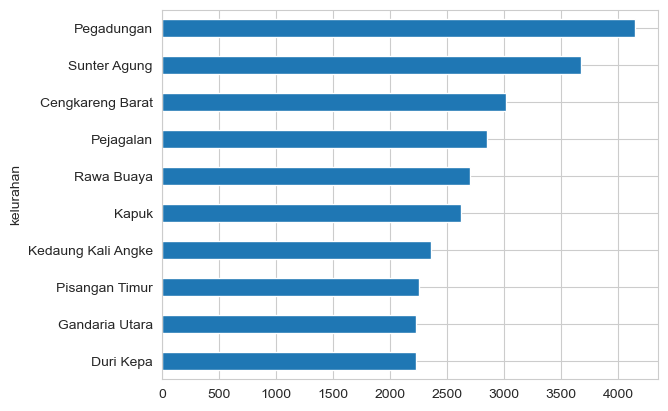

In [42]:
data_sekolah_rawan_kelurahan = data_sekolah_rawan_clean.groupby(['kelurahan'])['jumlah_siswa'].sum().nlargest(10).sort_values(ascending=True)
ax = data_sekolah_rawan_kelurahan.plot.barh(x='jumlah_siswa', y='kelurahan')

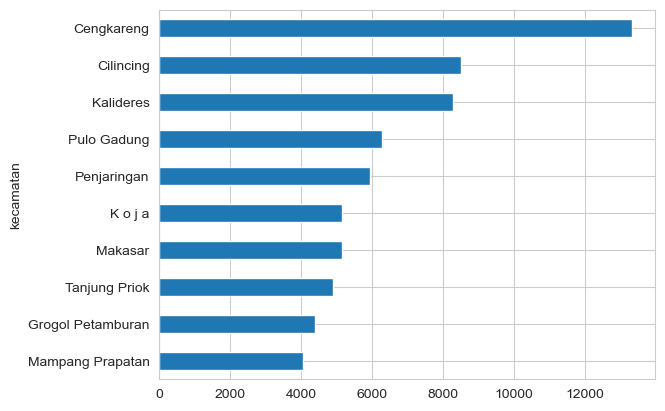

In [40]:
# data_sekolah_select = data_sekolah_rawan_clean.loc[data_sekolah_rawan_clean['kelurahan'].isin(data_sekolah_rawan_kelurahan.index)]
# data_sekolah_select_mean = data_sekolah_select.groupby(['kelurahan'])['jumlah_siswa'].mean().nlargest(10)

data_sekolah_rawan_kelurahan = data_sekolah_rawan_clean.groupby(['kecamatan'])['jumlah_siswa'].sum().nlargest(10).sort_values(ascending=True)
ax = data_sekolah_rawan_kelurahan.plot.barh(x='jumlah_siswa', y='kecamatan')

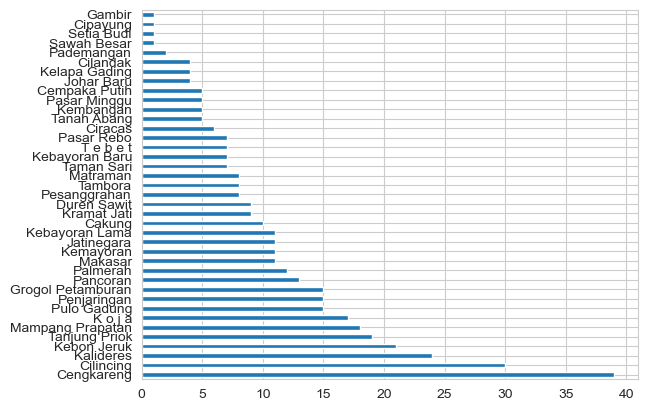

In [55]:
count_sekolah_kec = data_sekolah_rawan_clean.kecamatan.value_counts()
ax  = count_sekolah_kec.plot.barh(x=count_sekolah_kec.array, y=count_sekolah_kec.index)

Count top 10 sum of the school each of kecamatan with the highest amount of school

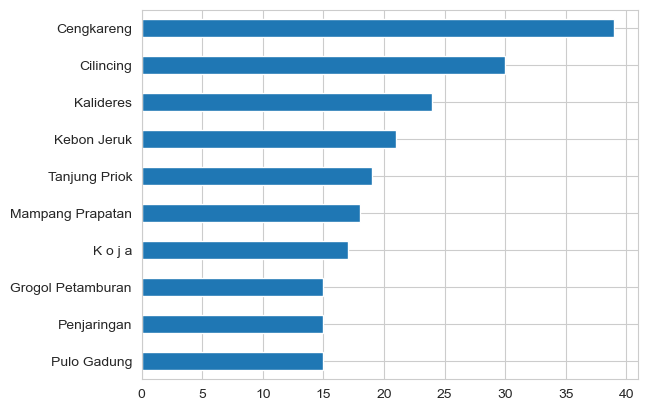

In [57]:
count_sekolah_kec = data_sekolah_rawan_clean.kecamatan.value_counts().nlargest(10).sort_values(ascending=True)
ax  = count_sekolah_kec.plot.barh(x=count_sekolah_kec.array, y=count_sekolah_kec.index)

Count top 10 sum of the school each of kelurahan with the highest amount of school

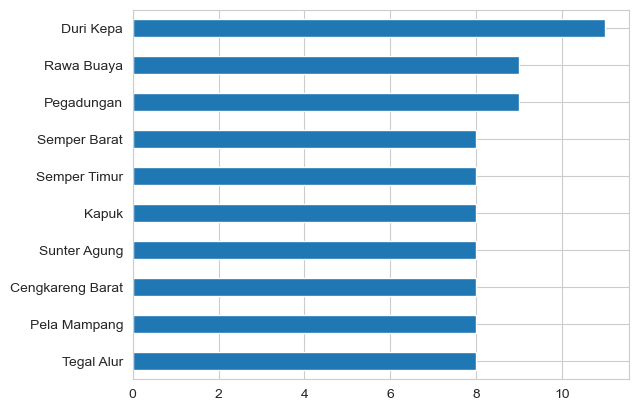

In [59]:
count_sekolah_kel = data_sekolah_rawan_clean.kelurahan.value_counts().nlargest(10).sort_values(ascending=True)
ax  = count_sekolah_kec.plot.barh(x=count_sekolah_kec.array, y=count_sekolah_kel.index)

In [92]:
data_sekolah_kel_jumlah = data_sekolah_rawan_clean.groupby(['kelurahan', 'kecamatan']).count()
data_sekolah_kel_jumlah['jumlah_sekolah'] = data_sekolah_kel_jumlah['nama_sekolah']
data_sekolah_kel_jumlah = data_sekolah_kel_jumlah.drop(columns=['nama_sekolah', 'alamat', 'jumlah_guru', 'jumlah_siswa', 'latitude','longitude'])
data_sekolah_kel_jumlah

,,jumlah_sekolah
kelurahan,kecamatan,
Bale Kembang,Kramat Jati,1
Bangka,Mampang Prapatan,6
Batu Ampar,Kramat Jati,2
Bidara Cina,Jatinegara,3
Bintaro,Pesanggrahan,1
...,...,...
Ulujami,Pesanggrahan,3
Utan Kayu Selatan,Matraman,3
Utan Kayu Utara,Matraman,2


Data sekolah combination for jumlah siswa, jumlah guru and jumlah sekolah

In [128]:
data_sekolah_kel_siswa = data_sekolah_rawan_clean.groupby(['kelurahan']).jumlah_siswa.sum()
data_sekolah_kel_guru = data_sekolah_rawan_clean.groupby(['kelurahan']).jumlah_guru.sum()

data_sekolah_kel_guru_siswa = pd.merge(data_sekolah_kel_siswa,data_sekolah_kel_guru, left_on='kelurahan', right_on='kelurahan')
data_sekolah_kel_guru_siswa = pd.merge(data_sekolah_kel_guru_siswa,data_sekolah_kel_jumlah, left_on='kelurahan', right_on='kelurahan' )

# Count how many PKBN, SMA, SMP, SDN, SDS https://www.kaggle.com/code/hamelg/python-for-data-15-working-with-text-data/notebook
data_sekolah_kel_guru_siswa

,jumlah_siswa,jumlah_guru,jumlah_sekolah
kelurahan,,,
Bale Kembang,406,14,1
Bangka,1617,98,6
Batu Ampar,1143,60,2
Bidara Cina,800,42,3
Bintaro,379,16,1
...,...,...,...
Ulujami,1167,48,3
Utan Kayu Selatan,810,37,3
Utan Kayu Utara,435,24,2


In [127]:
data_sekolah_kel_guru_siswa.index

Index(['Bale Kembang', 'Bangka', 'Batu Ampar', 'Bidara Cina', 'Bintaro',
       'Bukit Duri', 'Cakung Barat', 'Cempaka Baru', 'Cempaka Putih Barat',
       'Cempaka Putih Timur',
       ...
       'Tegal Alur', 'Tegal Parang', 'Tomang', 'Tugu Selatan', 'Tugu Utara',
       'Ulujami', 'Utan Kayu Selatan', 'Utan Kayu Utara', 'Warakas',
       'Wijaya Kusuma'],
      dtype='object', name='kelurahan', length=141)

In [ ]:
# merging with other dataset, based on the kelurahan https://www.kaggle.com/code/hamelg/python-for-data-18-merging-data/notebook

# Potensi-wilayah-banjir-akibat-aliran-sungai-2013 [DONE]

In [97]:
# dataset/daerah-rawan-banjir-dki-jakarta.csv
# path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"
path_data = "dataset/potensi-wilayah-banjir-akibat-aliran-sungai-2013.csv"
df_rawan_banjir = pd.read_csv(path_data)

df_rawan_banjir

,kota,kecamatan,kelurahan,sungai
0,JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,ANGKE
1,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,ANGKE
2,JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,ANGKE
3,JAKARTA BARAT,CENGKARENG,KAPUK,ANGKE
4,JAKARTA BARAT,CENGKARENG,KEDAUNG KALI ANGKE,ANGKE
...,...,...,...,...
119,JAKARTA UTARA,KOJA,RAWABADAK UTARA,SUNTER
120,JAKARTA TIMUR,CIPAYUNG,SETU,SUNTER
121,JAKARTA PUSAT,KEMAYORAN,SUMUR BATU,SUNTER
122,JAKARTA UTARA,TANJUNG PRIOK,SUNGAI BAMBU,SUNTER


In [101]:
df_rawan_banjir.sungai.value_counts()

CILIWUNG                            28
SUNTER                              23
PESANGGRAHAN                        21
CIPINANG                            12
KRUKUT                              12
CILIWUNG ARAH KANAL BANJIR BARAT    10
CILIWUNG ARAH ISTANA NEGARA          9
ANGKE                                8
PESANGGRAHAN & ANGKE                 1
Name: sungai, dtype: int64

In [106]:
df_rawan_banjir['kecamatan'] = df_rawan_banjir['kecamatan'].str.lower()
df_rawan_banjir['kelurahan'] = df_rawan_banjir['kelurahan'].str.lower()
df_rawan_banjir['sungai'] = df_rawan_banjir['sungai'].str.lower()
df_rawan_banjir['kota'] = df_rawan_banjir['kota'].str.lower()

In [107]:
df_rawan_banjir

,kota,kecamatan,kelurahan,sungai
0,jakarta barat,cengkareng,cengkareng timur,angke
1,jakarta barat,cengkareng,cengkareng barat,angke
2,jakarta barat,cengkareng,duri kosambi,angke
3,jakarta barat,cengkareng,kapuk,angke
4,jakarta barat,cengkareng,kedaung kali angke,angke
...,...,...,...,...
119,jakarta utara,koja,rawabadak utara,sunter
120,jakarta timur,cipayung,setu,sunter
121,jakarta pusat,kemayoran,sumur batu,sunter
122,jakarta utara,tanjung priok,sungai bambu,sunter


In [124]:
# data_sekolah_kel_guru_siswa['kelurahan'] = data_sekolah_kel_guru_siswa.index

In [129]:
# data_sekolah_kel_guru_siswa['kelurahan'] = data_sekolah_kel_guru_siswa['kelurahan'].str.lower()
data_sekolah_kel_guru_siswa.index = data_sekolah_kel_guru_siswa.index.str.lower()
# data_sekolah_kel_guru_siswa = data_sekolah_kel_guru_siswa.reset_index(drop=True)
data_sekolah_kel_guru_siswa

,jumlah_siswa,jumlah_guru,jumlah_sekolah
kelurahan,,,
bale kembang,406,14,1
bangka,1617,98,6
batu ampar,1143,60,2
bidara cina,800,42,3
bintaro,379,16,1
...,...,...,...
ulujami,1167,48,3
utan kayu selatan,810,37,3
utan kayu utara,435,24,2


In [130]:
data_sekolah_sungai = pd.merge(data_sekolah_kel_guru_siswa,df_rawan_banjir, left_on='kelurahan', right_on='kelurahan' )
data_sekolah_sungai

,kelurahan,jumlah_siswa,jumlah_guru,jumlah_sekolah,kota,kecamatan,sungai
0,bangka,1617,98,6,jakarta selatan,mampang prapatan,krukut
1,bidara cina,800,42,3,jakarta timur,jatinegara,ciliwung
2,bintaro,379,16,1,jakarta selatan,pesanggrahan,pesanggrahan
3,bukit duri,1459,90,4,jakarta selatan,tebet,ciliwung
4,cengkareng barat,3020,116,8,jakarta barat,cengkareng,angke
...,...,...,...,...,...,...,...
73,sunter jaya,255,33,2,jakarta utara,tanjung priok,sunter
74,tanjung duren utara,290,17,1,jakarta barat,grogol petamburan,pesanggrahan
75,tegal parang,360,36,3,jakarta selatan,mampang prapatan,krukut
76,tomang,541,25,1,jakarta barat,grogol petamburan,ciliwung arah kanal banjir barat


# Data Kejadian All

In [193]:
path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"
data_kejadian_januari = pd.read_csv(path)

In [196]:
data_kejadian_januari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           150 non-null    object
 1   kecamatan                   150 non-null    object
 2   kelurahan                   150 non-null    object
 3   rw                          150 non-null    object
 4   jumlah_terdampak_rw         150 non-null    int64 
 5   jumlah_terdampak_rt         150 non-null    int64 
 6   jumlah_terdampak_kk         150 non-null    int64 
 7   jumlah_terdampak_jiwa       150 non-null    int64 
 8   ketinggian_air              150 non-null    object
 9   tanggal_kejadian            150 non-null    object
 10  lama_genangan               150 non-null    int64 
 11  jumlah_meninggal            150 non-null    int64 
 12  jumlah_hilang               150 non-null    int64 
 13  jumlah_luka_berat           150 non-null    int64 

In [197]:
data_kejadian_januari

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Jakarta Timur,PASAR REBO,PEKAYON,"RW 02, 08",2,2,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
146,Jakarta Timur,PASAR REBO,GEDONG,"RW. 01, 03, 11",3,3,25,100,100 s/d 150 cm,tgl. 01 Januari,0,0,0,0,100,1,0,0
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
148,Jakarta Timur,PULOGADUNG,JATI,RW 08,1,2,21,84,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0


In [198]:
from collections import defaultdict

all_data_kejadian_d = defaultdict()

bulan = [ 'januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli','agustus', 'september', 'oktober', 'november', 'desember'  ]

for month in bulan:
    path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-{}.csv".format(month)
    data_rekap = pd.read_csv(path)
    all_data_kejadian_d[month] = data_rekap

In [199]:
all_data_kejadian = pd.concat(all_data_kejadian_d)
all_data_kejadian

kota_administrasi               kecamatan              kelurahan  \
januari  0      Jakarta Pusat              JOHAR BARU             JOHAR BARU   
         1      Jakarta Pusat               KEMAYORAN  GUNUNG SAHARI SELATAN   
         2      Jakarta Pusat               KEMAYORAN                SERDANG   
         3      Jakarta Pusat             SAWAH BESAR             PASAR BARU   
         4      Jakarta Pusat             TANAH ABANG        BENDUNGAN HILIR   
...                       ...                     ...                    ...   
desember 42  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         43  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         44  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         45  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         46  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   

                                        rw  jumlah_terdampak_rw  \
januari  0               RW 01, 02, 06, 08                    4   
         1               RW 01, 02, 07, 08                    4   
         2               RW 01, 02, 06, 07                    4   
         3   RW 02, 03, 04, 05, 06, 07, 08                    7   
         4                       RW 07, 09                    2   
...                                    ...                  ...   
desember 42                              0                    0   
         43                              0                    0   
         44                              0                    0   
         45                        RW : 02                    1   
         46                              0                    0   

             jumlah_terdampak_rt jumlah_terdampak_kk  jumlah_terdampak_jiwa  \
januari  0                     4                  35                    140   
         1                     4                   0                      0   
         2                     4                   0                      0   
         3                     7                 155                    625   
         4                     2                  52                    195   
...                          ...                 ...                    ...   
desember 42                    1                   0                      0   
         43                    1                   0                      0   
         44                    1                   0                      0   
         45                    1                   0                      0   
         46                    1                   0                      0   

            ketinggian_air tanggal_kejadian  lama_genangan  jumlah_meninggal  \
januari  0    10 s/d 30 cm  tgl. 01 Januari              0                 0   
         1    10 s/d 70 cm  tgl. 01 Januari              0                 0   
         2    10 s/d 30 cm  tgl. 01 Januari              1                 0   
         3    10 s/d 70 cm  tgl. 01 Januari              0                 0   
         4    31 s/d 70 cm  tgl. 01 Januari              0                 0   
...                    ...              ...            ...               ...   
desember 42   10 s/d 15 cm       2020-12-15              0                 0   
         43    5 s/d 20 cm       2020-12-15              0                 0   
         44          15 cm       2020-12-15              0                 0   
         45           5 cm       2020-12-15              0                 0   
         46    5 s/d 20 cm       2020-12-15              0                 0   

             jumlah_hilang  jumlah_luka_berat  jumlah_luka_ringan  \
januari  0               0                  0                 140   
         1               0                  0                   0   
         2               0                  0                   0   
         3               0                  0               

In [200]:
for month in bulan:
    path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-{}.csv".format(month)
    print(path)

dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv
dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-februari.csv
dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-maret.csv
dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-april.csv
dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-mei.csv
dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-juni.csv
dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-juli.csv
dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-agustus.csv
dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-september.csv
dataset/data

In [206]:
all_data_kejadian.index

MultiIndex([( 'januari',  0),
            ( 'januari',  1),
            ( 'januari',  2),
            ( 'januari',  3),
            ( 'januari',  4),
            ( 'januari',  5),
            ( 'januari',  6),
            ( 'januari',  7),
            ( 'januari',  8),
            ( 'januari',  9),
            ...
            ('desember', 37),
            ('desember', 38),
            ('desember', 39),
            ('desember', 40),
            ('desember', 41),
            ('desember', 42),
            ('desember', 43),
            ('desember', 44),
            ('desember', 45),
            ('desember', 46)],
           length=1006)

In [207]:
all_data_kejadian['max_tinggi_air']  = all_data_kejadian.ketinggian_air.str.extract(r'(\d+)\scm')
all_data_kejadian['min_tinggi_air']  = all_data_kejadian.ketinggian_air.str.extract(r'(\d+)\ss/d')

all_data_kejadian['min_tinggi_air']  = all_data_kejadian.ketinggian_air.str.extract(r'(\d+)\ss/d')

In [208]:
all_data_kejadian

kota_administrasi               kecamatan              kelurahan  \
januari  0      Jakarta Pusat              JOHAR BARU             JOHAR BARU   
         1      Jakarta Pusat               KEMAYORAN  GUNUNG SAHARI SELATAN   
         2      Jakarta Pusat               KEMAYORAN                SERDANG   
         3      Jakarta Pusat             SAWAH BESAR             PASAR BARU   
         4      Jakarta Pusat             TANAH ABANG        BENDUNGAN HILIR   
...                       ...                     ...                    ...   
desember 42  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         43  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         44  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         45  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         46  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   

                                        rw  jumlah_terdampak_rw  \
januari  0               RW 01, 02, 06, 08                    4   
         1               RW 01, 02, 07, 08                    4   
         2               RW 01, 02, 06, 07                    4   
         3   RW 02, 03, 04, 05, 06, 07, 08                    7   
         4                       RW 07, 09                    2   
...                                    ...                  ...   
desember 42                              0                    0   
         43                              0                    0   
         44                              0                    0   
         45                        RW : 02                    1   
         46                              0                    0   

             jumlah_terdampak_rt jumlah_terdampak_kk  jumlah_terdampak_jiwa  \
januari  0                     4                  35                    140   
         1                     4                   0                      0   
         2                     4                   0                      0   
         3                     7                 155                    625   
         4                     2                  52                    195   
...                          ...                 ...                    ...   
desember 42                    1                   0                      0   
         43                    1                   0                      0   
         44                    1                   0                      0   
         45                    1                   0                      0   
         46                    1                   0                      0   

            ketinggian_air tanggal_kejadian  lama_genangan  jumlah_meninggal  \
januari  0    10 s/d 30 cm  tgl. 01 Januari              0                 0   
         1    10 s/d 70 cm  tgl. 01 Januari              0                 0   
         2    10 s/d 30 cm  tgl. 01 Januari              1                 0   
         3    10 s/d 70 cm  tgl. 01 Januari              0                 0   
         4    31 s/d 70 cm  tgl. 01 Januari              0                 0   
...                    ...              ...            ...               ...   
desember 42   10 s/d 15 cm       2020-12-15              0                 0   
         43    5 s/d 20 cm       2020-12-15              0                 0   
         44          15 cm       2020-12-15              0                 0   
         45           5 cm       2020-12-15              0                 0   
         46    5 s/d 20 cm       2020-12-15              0                 0   

             jumlah_hilang  jumlah_luka_berat  jumlah_luka_ringan  \
januari  0               0                  0                 140   
         1               0                  0                   0   
         2               0                  0                   0   
         3               0                  0               

In [209]:
all_data_kejadian = all_data_kejadian.drop(columns='rw')
all_data_kejadian['lama_kejadian'] = all_data_kejadian.tanggal_kejadian.str.count(r'(\d+,*)')

In [210]:
all_data_kejadian

kota_administrasi               kecamatan              kelurahan  \
januari  0      Jakarta Pusat              JOHAR BARU             JOHAR BARU   
         1      Jakarta Pusat               KEMAYORAN  GUNUNG SAHARI SELATAN   
         2      Jakarta Pusat               KEMAYORAN                SERDANG   
         3      Jakarta Pusat             SAWAH BESAR             PASAR BARU   
         4      Jakarta Pusat             TANAH ABANG        BENDUNGAN HILIR   
...                       ...                     ...                    ...   
desember 42  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         43  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         44  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         45  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   
         46  Kepulauan Seribu  KEPULAUAN SERIBU UTARA          PULAU HARAPAN   

             jumlah_terdampak_rw  jumlah_terdampak_rt jumlah_terdampak_kk  \
januari  0                     4                    4                  35   
         1                     4                    4                   0   
         2                     4                    4                   0   
         3                     7                    7                 155   
         4                     2                    2                  52   
...                          ...                  ...                 ...   
desember 42                    0                    1                   0   
         43                    0                    1                   0   
         44                    0                    1                   0   
         45                    1                    1                   0   
         46                    0                    1                   0   

             jumlah_terdampak_jiwa ketinggian_air tanggal_kejadian  \
januari  0                     140   10 s/d 30 cm  tgl. 01 Januari   
         1                       0   10 s/d 70 cm  tgl. 01 Januari   
         2                       0   10 s/d 30 cm  tgl. 01 Januari   
         3                     625   10 s/d 70 cm  tgl. 01 Januari   
         4                     195   31 s/d 70 cm  tgl. 01 Januari   
...                            ...            ...              ...   
desember 42                      0   10 s/d 15 cm       2020-12-15   
         43                      0    5 s/d 20 cm       2020-12-15   
         44                      0          15 cm       2020-12-15   
         45                      0           5 cm       2020-12-15   
         46                      0    5 s/d 20 cm       2020-12-15   

             lama_genangan  jumlah_meninggal  jumlah_hilang  \
januari  0               0                 0              0   
         1               0                 0              0   
         2               1                 0              0   
         3               0                 0              0   
         4               0                 0              0   
...                    ...               ...            ...   
desember 42              0                 0              0   
         43              0                 0              0   
         44              0                 0              0   
         45              0                 0              0   
         46              0                 0              0   

             jumlah_luka_berat  jumlah_luka_ringan  \
januari  0                   0                 140   
         1                   0                   0   
         2                   0                   0   
         3                   0                 625   
         4                   0                 195   
...                        ...                 ...   
desember 42                  0                   0   
         43                  0                   0   
         44                  0            

In [211]:
all_data_kejadian['max_tinggi_air'] = pd.to_numeric(all_data_kejadian['max_tinggi_air'])
all_data_kejadian['min_tinggi_air'] = pd.to_numeric(all_data_kejadian['min_tinggi_air'])


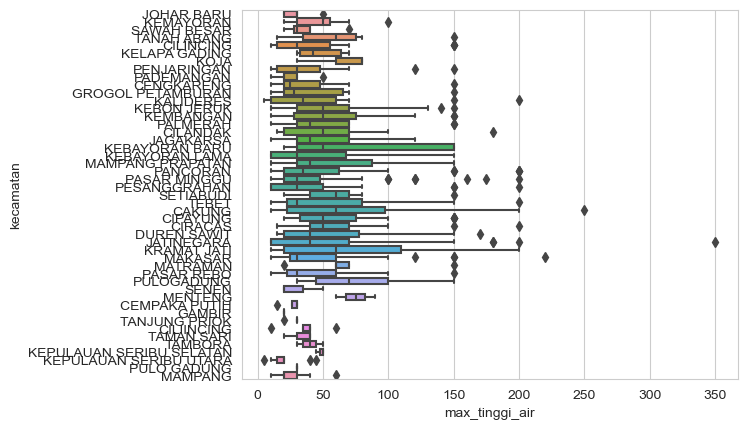

In [212]:
sns.boxplot(data=all_data_kejadian, x="max_tinggi_air", y="kecamatan")

In [214]:
all_data_kejadian.corr()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
jumlah_terdampak_rw,1.000000,0.738970,0.410625,0.210648,NaN,NaN,NaN,0.494768,0.075602,-0.036884,NaN,0.451795,0.061015,0.131443
jumlah_terdampak_rt,0.738970,1.000000,0.454786,0.140451,NaN,NaN,NaN,0.346780,0.057264,-0.037969,NaN,0.402839,0.014915,0.251100
jumlah_terdampak_jiwa,0.410625,0.454786,1.000000,0.115702,NaN,NaN,NaN,0.630381,0.136214,0.026426,NaN,0.327316,0.089934,0.153656
lama_genangan,0.210648,0.140451,0.115702,1.000000,NaN,NaN,NaN,0.295128,0.036675,-0.010689,NaN,0.217050,0.051241,0.039418
jumlah_meninggal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_hilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_luka_berat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_luka_ringan,0.494768,0.346780,0.630381,0.295128,NaN,NaN,NaN,1.000000,0.137056,-0.021228,NaN,0.432886,0.225390,0.009920
jumlah_pengungsi_tertinggi,0.075602,0.057264,0.136214,0.036675,NaN,NaN,NaN,0.137056,1.000000,0.873923,NaN,0.101324,0.192480,0.033303
jumlah_tempat_pengungsian,-0.036884,-0.037969,0.026426,-0.010689,NaN,NaN,NaN,-0.021228,0.873923,1.000000,NaN,0.015943,-0.046385,0.064505


ValueError: could not convert string to float: ''

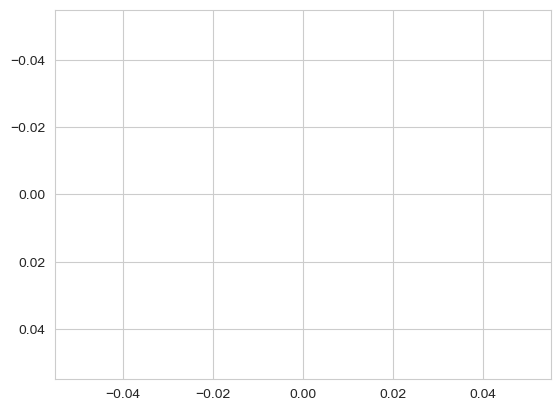

In [215]:
# sns.scatterplot(data=all_data_kejadian, x="jumlah_terdampak_jiwa", y="jumlah_terdampak_kk")

In [216]:
all_data_kejadian.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1006 entries, ('januari', 0) to ('desember', 46)
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kota_administrasi           1006 non-null   object 
 1   kecamatan                   1006 non-null   object 
 2   kelurahan                   1006 non-null   object 
 3   jumlah_terdampak_rw         1006 non-null   int64  
 4   jumlah_terdampak_rt         1006 non-null   int64  
 5   jumlah_terdampak_kk         1006 non-null   object 
 6   jumlah_terdampak_jiwa       1006 non-null   int64  
 7   ketinggian_air              1006 non-null   object 
 8   tanggal_kejadian            1006 non-null   object 
 9   lama_genangan               1006 non-null   int64  
 10  jumlah_meninggal            1006 non-null   int64  
 11  jumlah_hilang               1006 non-null   int64  
 12  jumlah_luka_berat           1006 non-null   int64  
 13  jumlah_l

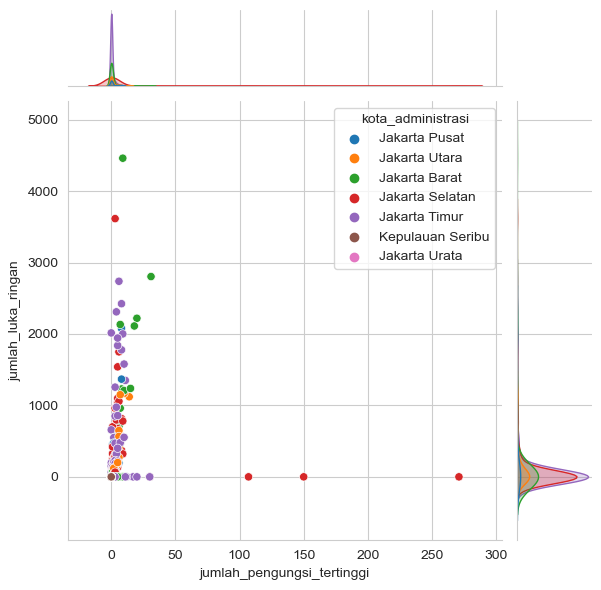

In [217]:
sns.jointplot(data=all_data_kejadian, x="jumlah_pengungsi_tertinggi", y="jumlah_luka_ringan", hue="kota_administrasi")

In [218]:
all_rekap

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
0,2013,1,35,124,10 - 400,15,2414,506164.0,1226487.0,38,0,0,0,83554,1115
1,2013,2,15,34,10 - 175,8,207,19177.0,46865.0,0,0,0,0,740,21
2,2013,3,5,9,10 - 250,2,68,9215.0,27020.0,0,0,0,0,2406,34
3,2013,4,10,16,10 - 100,4,66,6004.0,15060.0,0,0,0,0,318,7
4,2013,5,10,16,0 - 160,3,139,4740.0,18481.0,0,0,0,0,1245,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020,8,10,12,10 s.d 80 cm,1,20,0,0,0,0,0,0,0,0
91,2020,9,16,28,10 s.d 130 cm,2,65,414,1300,0,0,0,0,104,5
92,2020,10,29,72,10 s.d 180 cm,2,170,1933,6250,0,0,0,0,675,12
93,2020,11,16,27,10 s.d 60 cm,2,54,0,0,0,0,0,0,0,0
